***
# Supervised Learning : Convolutional Neural Network Frameworks for Multi-Class Image Classification

***
### John Pauline Pineda <br> <br> *December 30, 2023*
***

* [**1. Table of Contents**](#TOC)
    * [1.1 Data Background](#1.1)
    * [1.2 Data Description](#1.2)
    * [1.3 Data Quality Assessment](#1.3)
    * [1.4 Data Preprocessing](#1.4)
        * [1.4.1 Image Description](#1.4.1)
        * [1.4.2 Image Augmentation](#1.4.2)
    * [1.5 Data Exploration](#1.5)
        * [1.5.1 Exploratory Data Analysis](#1.5.1)
    * [1.6 Model Development](#1.6)
        * [1.6.1 Premodelling Data Description](#1.6.1)
        * [1.6.2 CNN With No Regularization](#1.6.2)
        * [1.6.3 CNN With Dropout Regularization](#1.6.3)
        * [1.6.4 CNN With Batch Normalization Regularization](#1.6.4)
        * [1.6.5 CNN With Dropout and Batch Normalization Regularization](#1.6.5)
    * [1.7 Consolidated Findings](#1.7)   
* [**2. Summary**](#Summary)   
* [**3. References**](#References)

***

# 1. Table of Contents <a class="anchor" id="TOC"></a>

This project explores the various convolutional neural network (CNN) frameworks for processeing images through convolutional, activation, pooling, and fully connected layers, capturing hierarchical features and learning to map input images to their respective classes during training using various helpful packages in <mark style="background-color: #CCECFF"><b>Python</b></mark>. Various CNN architectures applied in the analysis to learn features and patterns at different levels of abstraction in images included **CNN Without Regularization**, **CNN With Dropout Regularization**, **CNN With Batch Normalization Regularization** and **CNN With Dropout and Batch Normalization Regularization**. The different CNN algorithms were evaluated using the categorical cross entropy loss which measures the difference between the predicted probability distribution and the true distribution of the class labels. Model multi-classification performance was measured using **Accuracy**, **Precision**, **Recall** and **F1 Score**. All results were consolidated in a [<span style="color: #FF0000"><b>Summary</b></span>](#Summary) presented at the end of the document.

A [convolutional neural network model](https://link.springer.com/book/10.1007/978-1-4614-6849-3?page=1) is a type of neural network architecture specifically designed for image classification and computer vision tasks by automatically learning hierarchical features directly from raw pixel data. The core building block of a CNN is the convolutional layer. Convolution operations apply learnable filters (kernels) to input images to detect patterns such as edges, textures, and more complex structures. The layers systematically learn hierarchical features from low-level (e.g., edges) to high-level (e.g., object parts) as the network deepens. Filters are shared across the entire input space, enabling the model to recognize patterns regardless of their spatial location. After convolutional operations, an activation function is applied element-wise to introduce non-linearity and allow the model to learn complex relationships between features. Pooling layers downsample the spatial dimensions of the feature maps, reducing the computational load and the number of parameters in the network - creating spatial hierarchy and translation invariance. Fully connected layers process the flattened features to make predictions and produce an output vector that corresponds to class probabilities using an activation function. The CNN is trained using backpropagation and optimization algorithms. A loss function is used to measure the difference between predicted and actual labels. The network adjusts its weights to minimize this loss. Gradients are calculated with respect to the loss, and the weights are updated accordingly through a backpropagation mechanism.


## 1.1. Data Background <a class="anchor" id="1.1"></a>

A subset of an open [COVID-19 Radiography Dataset](https://www.kaggle.com/datasets/preetviradiya/covid19-radiography-dataset) from [Kaggle](https://www.kaggle.com/) (with all credits attributed to [Preet Viradiya](https://www.kaggle.com/preetviradiya), [Juliana Negrini De Araujo](https://www.kaggle.com/jnegrini), [Tawsifur Rahman](https://www.kaggle.com/tawsifurrahman), [Muhammad Chowdhury](https://www.kaggle.com/mc16262) and [Amith Khandakar](https://www.kaggle.com/amithkhandakar)) was used for the analysis as consolidated from the following primary sources: 
1. Covid19 X-Ray Images from [BIMCV Medical Imaging Databank of the Valencia Region](https://bimcv.cipf.es/bimcv-projects/bimcv-covid19/#1590858128006-9e640421-6711)
2. Covid19 X-Ray Images from [GitHub: ML Group](https://github.com/ml-workgroup/covid-19-image-repository/tree/master/png)
3. Covid19 X-Ray Images from [Italian Society of Medical and Interventional Radiology](https://sirm.org/category/senza-categoria/covid-19/)
4. Covid19 X-Ray Images from [European Society of Radiology](https://eurorad.org/)
5. Covid19 X-Ray Images from [GitHub: Joseph Paul Cohen](https://github.com/ieee8023/covid-chestxray-dataset)
6. Covid19 X-Ray Images from [Publication: COVID-CXNet: Detecting COVID-19 in Frontal Chest X-ray Images using Deep Learning](https://github.com/armiro/COVID-CXNet)
7. Pneumonia and Normal X-Ray Images from [Kaggle: RSNA Pneumonia Detection Challenge](https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data)
8. Pneumonia and Normal X-Ray Images from [Kaggle: Chest X-Ray Images (Pneumonia)](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia)

This study hypothesized that images contain a hierarchy of features which allows the differentiation and classification across various image categories. 

The target variable for the study is:
* <span style="color: #FF0000">CLASS</span> - Multi-categorical diagnostic classification for the x-ray images 

The hierarchical representation of image features enables the network to transform raw pixel data into a meaningful and compact representation, allowing it to make accurate predictions during image classification. The different features automatically learned during the training process are as follows:
* <span style="color: #FF0000">LOW-LEVEL FEATURES</span> - Edges and textures
* <span style="color: #FF0000">MID-LEVEL FEATURES</span> - Patterns and shapes
* <span style="color: #FF0000">HIGH-LEVEL FEATURES</span> - Object parts
* <span style="color: #FF0000">ABSTRACT FEATURES</span> - Object semantics
* <span style="color: #FF0000">SEMANTIC CONCEPTS</span> - Object categories
* <span style="color: #FF0000">HIERARCHICAL REPRESENTATION</span> - Spatial hierarchy
* <span style="color: #FF0000">ROTATION | SCALE INVARIANCE</span> - Invariant features
* <span style="color: #FF0000">LOCALIZATION INFORMATION</span> - Spatial localization

## 1.2. Data Description <a class="anchor" id="1.2"></a>

1. The dataset is comprised of:
    * **3600 images** (observations)
    * **1 target** (variable)
        * <span style="color: #FF0000">CLASS: COVID</span> = **1200 images**
        * <span style="color: #FF0000">CLASS: Normal</span> = **1200 images**
        * <span style="color: #FF0000">CLASS: Viral Pneumonia</span> = **1200 images**

In [1]:
##################################
# Installing important packages
##################################
# !pip install mlxtend
# !pip install --upgrade tensorflow
# !pip install opencv-python
# !pip install keras==2.12.0

In [2]:
##################################
# Loading Python Libraries 
# for Data Loading,
# Data Preprocessing and
# Exploratory Data Analysis
##################################
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
%matplotlib inline
import tensorflow as tf
import keras
from PIL import Image
from glob import glob
import cv2
import os
import random

In [3]:
##################################
# Loading Python Libraries 
# for Model Development
##################################
from keras import backend as K
from keras import regularizers
from keras.models import Sequential, Model,load_model
from keras.layers import Activation, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, MaxPool2D, AveragePooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import img_to_array, array_to_img

In [4]:
##################################
# Loading Python Libraries 
# for Model Evaluation
##################################
from keras.metrics import PrecisionAtRecall, Recall 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

In [5]:
##################################
# Setting random seed options
# for the analysis
##################################
def set_seed(seed=88888888):
    np.random.seed(seed) 
    tf.random.set_seed(seed) 
    keras.utils.set_random_seed(seed)
    random.seed(seed)
    tf.config.experimental.enable_op_determinism()
    os.environ['TF_DETERMINISTIC_OPS'] = "1"
    os.environ['TF_CUDNN_DETERMINISM'] = "1"
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed()

In [6]:
##################################
# Loading the dataset
##################################
path = 'C:/Users/John pauline magno/Python Notebooks/COVID-19_Radiography_Dataset/'

##################################
# Defining the image category levels
##################################
diagnosis_code_dictionary = {'COVID': 0,
                             'Normal': 1,
                             'Viral Pneumonia': 2}

##################################
# Defining the image category descriptions
##################################
diagnosis_description_dictionary = {'COVID': 'Covid-19',
                                    'Normal': 'Healthy',
                                    'Viral Pneumonia': 'Viral Pneumonia'}

##################################
# Consolidating the image path
##################################
imageid_path_dictionary = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join(path, '*','*.png'))}

In [7]:
##################################
# Taking a snapshot of the dictionary
##################################
dict(list(imageid_path_dictionary.items())[0:5]) 

{'COVID-1': 'C:/Users/John pauline magno/Python Notebooks/COVID-19_Radiography_Dataset\\COVID\\COVID-1.png',
 'COVID-10': 'C:/Users/John pauline magno/Python Notebooks/COVID-19_Radiography_Dataset\\COVID\\COVID-10.png',
 'COVID-100': 'C:/Users/John pauline magno/Python Notebooks/COVID-19_Radiography_Dataset\\COVID\\COVID-100.png',
 'COVID-1000': 'C:/Users/John pauline magno/Python Notebooks/COVID-19_Radiography_Dataset\\COVID\\COVID-1000.png',
 'COVID-1001': 'C:/Users/John pauline magno/Python Notebooks/COVID-19_Radiography_Dataset\\COVID\\COVID-1001.png'}

In [8]:
##################################
# Consolidating the information
# from the dataset
# into a dataframe
##################################
xray_images = pd.DataFrame.from_dict(imageid_path_dictionary, orient = 'index').reset_index()
xray_images.columns = ['Image_ID','Path']
classes = xray_images.Image_ID.str.split('-').str[0]
xray_images['Diagnosis'] = classes
xray_images['Target'] = xray_images['Diagnosis'].map(diagnosis_code_dictionary.get) 
xray_images['Class'] = xray_images['Diagnosis'].map(diagnosis_description_dictionary.get) 

In [9]:
##################################
# Performing a general exploration of the dataset
##################################
print('Dataset Dimensions: ')
display(xray_images.shape)

Dataset Dimensions: 


(3600, 5)

In [10]:
##################################
# Listing the column names and data types
##################################
print('Column Names and Data Types:')
display(xray_images.dtypes)

Column Names and Data Types:


Image_ID     object
Path         object
Diagnosis    object
Target        int64
Class        object
dtype: object

In [11]:
##################################
# Taking a snapshot of the dataset
##################################
xray_images.head()

,Image_ID,Path,Diagnosis,Target,Class
0,COVID-1,C:/Users/John pauline magno/Python Notebooks/C...,COVID,0,Covid-19
1,COVID-10,C:/Users/John pauline magno/Python Notebooks/C...,COVID,0,Covid-19
2,COVID-100,C:/Users/John pauline magno/Python Notebooks/C...,COVID,0,Covid-19
3,COVID-1000,C:/Users/John pauline magno/Python Notebooks/C...,COVID,0,Covid-19
4,COVID-1001,C:/Users/John pauline magno/Python Notebooks/C...,COVID,0,Covid-19


In [12]:
##################################
# Performing a general exploration of the numeric variables
##################################
print('Numeric Variable Summary:')
display(xray_images.describe(include='number').transpose())

Numeric Variable Summary:


,count,mean,std,min,25%,50%,75%,max
Target,3600.0,1.0,0.81661,0.0,0.0,1.0,2.0,2.0


In [13]:
##################################
# Performing a general exploration of the object variable
##################################
print('Object Variable Summary:')
display(xray_images.describe(include='object').transpose())

Object Variable Summary:


,count,unique,top,freq
Image_ID,3600,3600,COVID-1,1
Path,3600,3600,C:/Users/John pauline magno/Python Notebooks/C...,1
Diagnosis,3600,3,COVID,1200
Class,3600,3,Covid-19,1200


In [14]:
##################################
# Performing a general exploration of the target variable
##################################
xray_images.Diagnosis.value_counts()

COVID              1200
Normal             1200
Viral Pneumonia    1200
Name: Diagnosis, dtype: int64

In [15]:
##################################
# Performing a general exploration of the target variable
##################################
xray_images.Diagnosis.value_counts(normalize=True)

COVID              0.333333
Normal             0.333333
Viral Pneumonia    0.333333
Name: Diagnosis, dtype: float64

## 1.3. Data Quality Assessment <a class="anchor" id="1.3"></a>

Data quality findings based on assessment are as follows:
1. Details
    * 1.1 Details
        * 1.1.1 Details
            * 1.1.1.1 Details

In [16]:
##################################
# Counting the number of duplicated images
##################################
xray_images.duplicated().sum()

0

In [17]:
##################################
# Gathering the number of null images
##################################
xray_images.isnull().sum()

Image_ID     0
Path         0
Diagnosis    0
Target       0
Class        0
dtype: int64

## 1.4. Data Preprocessing <a class="anchor" id="1.4"></a>


### 1.4.1 Image Description <a class="anchor" id="1.4.1"></a>

1. Details
    * 1.1 Details
        * 1.1.1 Details
            * 1.1.1.1 Details

In [18]:
##################################
# Including the pixel information
# of the actual images
# in array format
# into a dataframe
##################################
xray_images['Image'] = xray_images['Path'].map(lambda x: np.asarray(Image.open(x).resize((75,75))))

In [19]:
##################################
# Listing the column names and data types
##################################
print('Column Names and Data Types:')
display(xray_images.dtypes)

Column Names and Data Types:


Image_ID     object
Path         object
Diagnosis    object
Target        int64
Class        object
Image        object
dtype: object

In [20]:
##################################
# Taking a snapshot of the dataset
##################################
xray_images.head()

,Image_ID,Path,Diagnosis,Target,Class,Image
0,COVID-1,C:/Users/John pauline magno/Python Notebooks/C...,COVID,0,Covid-19,"[[15, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
1,COVID-10,C:/Users/John pauline magno/Python Notebooks/C...,COVID,0,Covid-19,"[[129, 125, 123, 121, 119, 117, 114, 104, 104,..."
2,COVID-100,C:/Users/John pauline magno/Python Notebooks/C...,COVID,0,Covid-19,"[[11, 0, 0, 3, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0..."
3,COVID-1000,C:/Users/John pauline magno/Python Notebooks/C...,COVID,0,Covid-19,"[[42, 39, 38, 42, 38, 35, 31, 26, 24, 24, 24, ..."
4,COVID-1001,C:/Users/John pauline magno/Python Notebooks/C...,COVID,0,Covid-19,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0,..."


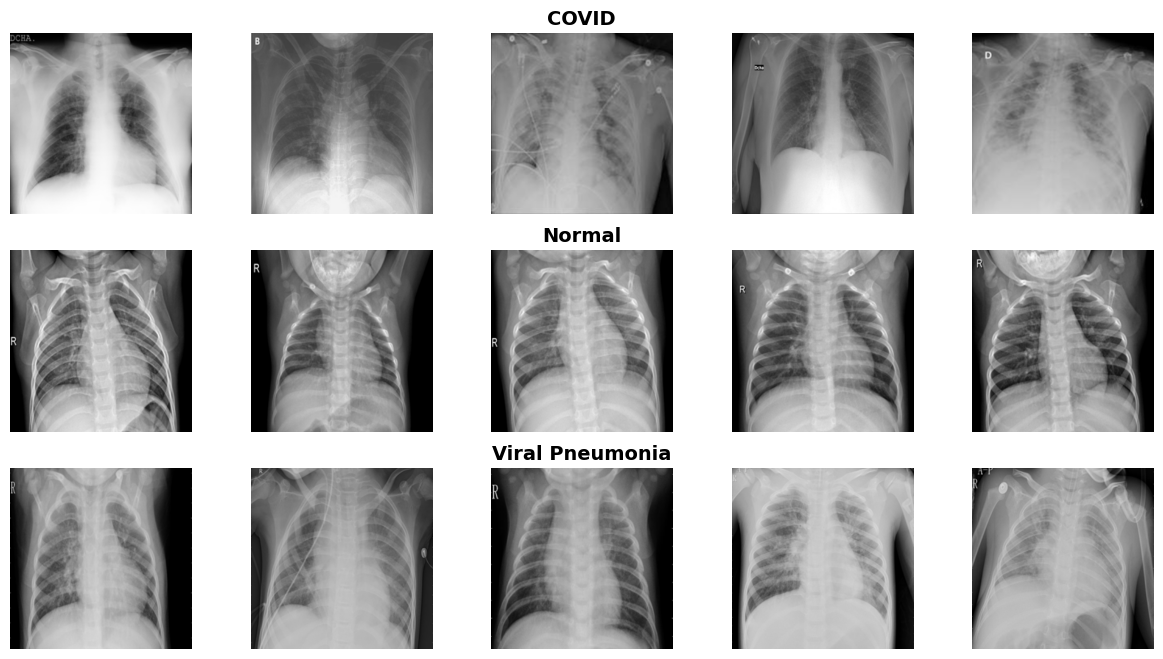

In [21]:
##################################
# Taking a snapshot of the dataset
##################################
n_samples = 5
fig, m_axs = plt.subplots(3, n_samples, figsize = (3*n_samples, 8))
for n_axs, (type_name, type_rows) in zip(m_axs, xray_images.sort_values(['Diagnosis']).groupby('Diagnosis')):
    n_axs[2].set_title(type_name, fontsize = 14, weight = 'bold')
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1).iterrows()):       
        picture = c_row['Path']
        image = cv2.imread(picture)
        c_ax.imshow(image)
        c_ax.axis('off')

In [22]:
##################################
# Sampling a single image
##################################
samples, features = xray_images.shape
plt.figure()
pic_id = random.randrange(0, samples)
picture = xray_images['Path'][pic_id]
image = cv2.imread(picture) 

<Figure size 640x480 with 0 Axes>

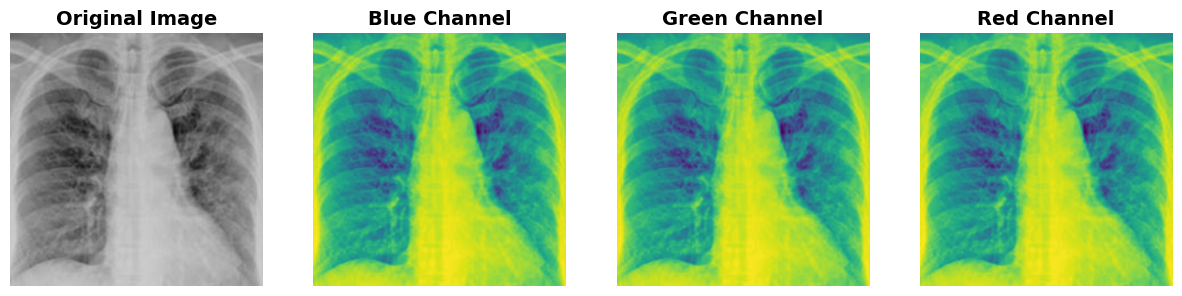

In [23]:
##################################
# Plotting using subplots
##################################
plt.figure(figsize=(15, 5))

##################################
# Formulating the original image
##################################
plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title('Original Image', fontsize = 14, weight = 'bold')
plt.axis('off')

##################################
# Formulating the blue channel
##################################
plt.subplot(1, 4, 2)
plt.imshow(image[ : , : , 0])
plt.title('Blue Channel', fontsize = 14, weight = 'bold')
plt.axis('off')

##################################
# Formulating the green channel
##################################
plt.subplot(1, 4, 3)
plt.imshow(image[ : , : , 1])
plt.title('Green Channel', fontsize = 14, weight = 'bold')
plt.axis('off')

##################################
# Formulating the red channel
##################################
plt.subplot(1, 4, 4)
plt.imshow(image[ : , : , 2])
plt.title('Red Channel', fontsize = 14, weight = 'bold')
plt.axis('off')

##################################
# Consolidating all images
##################################
plt.show()

In [24]:
##################################
# Determining the image shape
##################################
print('Image Shape:')
display(image.shape)

Image Shape:


(299, 299, 3)

In [25]:
##################################
# Determining the image height
##################################
print('Image Height:')
display(image.shape[0])

Image Height:


299

In [26]:
##################################
# Determining the image width
##################################
print('Image Width:')
display(image.shape[0])

Image Width:


299

In [27]:
##################################
# Determining the image dimension
##################################
print('Image Dimension:')
display(image.ndim)

Image Dimension:


3

In [28]:
##################################
# Determining the image size
##################################
print('Image Size:')
display(image.size)

Image Size:


268203

In [29]:
##################################
# Determining the image data type
##################################
print('Image Data Type:')
display(image.dtype)

Image Data Type:


dtype('uint8')

In [30]:
##################################
# Determining the maximum RGB value
##################################
print('Image Maximum RGB:')
display(image.max())

Image Maximum RGB:


205

In [31]:
##################################
# Determining the minimum RGB value
##################################
print('Image Minimum RGB:')
display(image.min())

Image Minimum RGB:


10

### 1.4.2 Image Augmentation <a class="anchor" id="1.4.2"></a>

1. Details
    * 1.1 Details
        * 1.1.1 Details
            * 1.1.1.1 Details

In [32]:
##################################
# Identifying the path for the images
# and defining image categories 
##################################
path = 'C:/Users/John pauline magno/Python Notebooks/COVID-19_Radiography_Dataset'
classes=["COVID", "Normal", "Viral Pneumonia"]
num_classes = len(classes)
batch_size = 16

In [33]:
##################################
# Creating subsets of images
# for model training and
# setting the parameters for
# real-time data augmentation
# at each epoch
##################################
set_seed()
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)


##################################
# Loading the model training images
##################################
train_gen = train_datagen.flow_from_directory(directory=path, 
                                              target_size=(299, 299),
                                              class_mode='categorical',
                                              subset='training',
                                              shuffle=True, 
                                              classes=classes,
                                              batch_size=batch_size, 
                                              color_mode="grayscale")

Found 2880 images belonging to 3 classes.


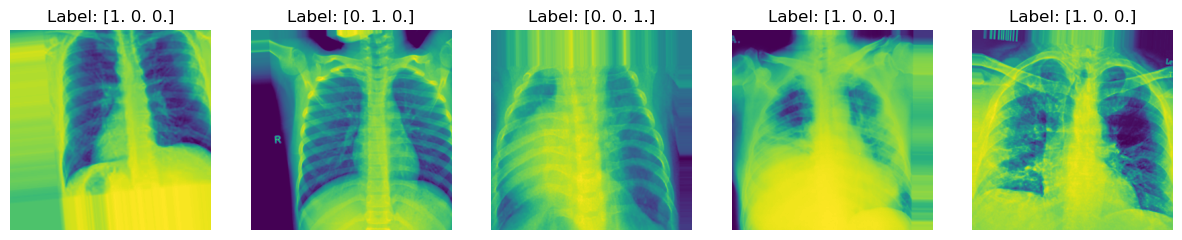

In [34]:
##################################
# Loading samples of augmented images
# for the training set
##################################
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i in range(5):
    batch = next(train_gen)
    images, labels = batch
    axes[i].imshow(images[0])  # Display the first image in the batch
    axes[i].set_title(f"Label: {labels[0]}")
    axes[i].axis('off')
plt.show()

In [35]:
##################################
# Creating subsets of images
# for model validation
# setting the parameters for
# real-time data augmentation
# at each epoch
##################################
set_seed()
test_datagen = ImageDataGenerator(rescale=1./255, 
                                  validation_split=0.2)

##################################
# Loading the model evaluation images
##################################
test_gen = test_datagen.flow_from_directory(directory=path, 
                                              target_size=(299, 299),
                                              class_mode='categorical',
                                              subset='validation',
                                              shuffle=False, classes=classes,
                                              batch_size=batch_size, 
                                              color_mode="grayscale")

Found 720 images belonging to 3 classes.


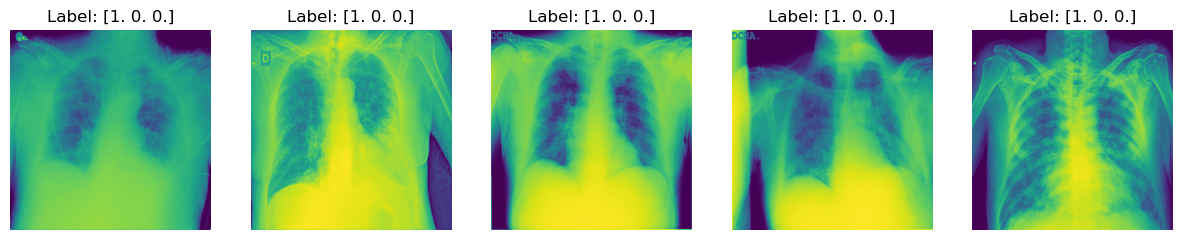

In [36]:
##################################
# Loading samples of augmented images
# for the validation set
##################################
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i in range(5):
    batch = next(test_gen)
    images, labels = batch
    axes[i].imshow(images[0])
    axes[i].set_title(f"Label: {labels[0]}")
    axes[i].axis('off')
plt.show()

## 1.5. Data Exploration <a class="anchor" id="1.5"></a>

### 1.5.1 Exploratory Data Analysis <a class="anchor" id="1.5.1"></a>

1. Details
    * 1.1 Details
        * 1.1.1 Details
            * 1.1.1.1 Details

In [37]:
##################################
# Consolidating summary statistics
# for the image pixel values
##################################
mean_val = []
std_dev_val = []
max_val = []
min_val = []

for i in range(0, samples):
    mean_val.append(xray_images['Image'][i].mean())
    std_dev_val.append(np.std(xray_images['Image'][i]))
    max_val.append(xray_images['Image'][i].max())
    min_val.append(xray_images['Image'][i].min())

imageEDA = xray_images.loc[:,['Image', 'Class','Path']]
imageEDA['Mean'] = mean_val
imageEDA['StDev'] = std_dev_val
imageEDA['Max'] = max_val
imageEDA['Min'] = min_val

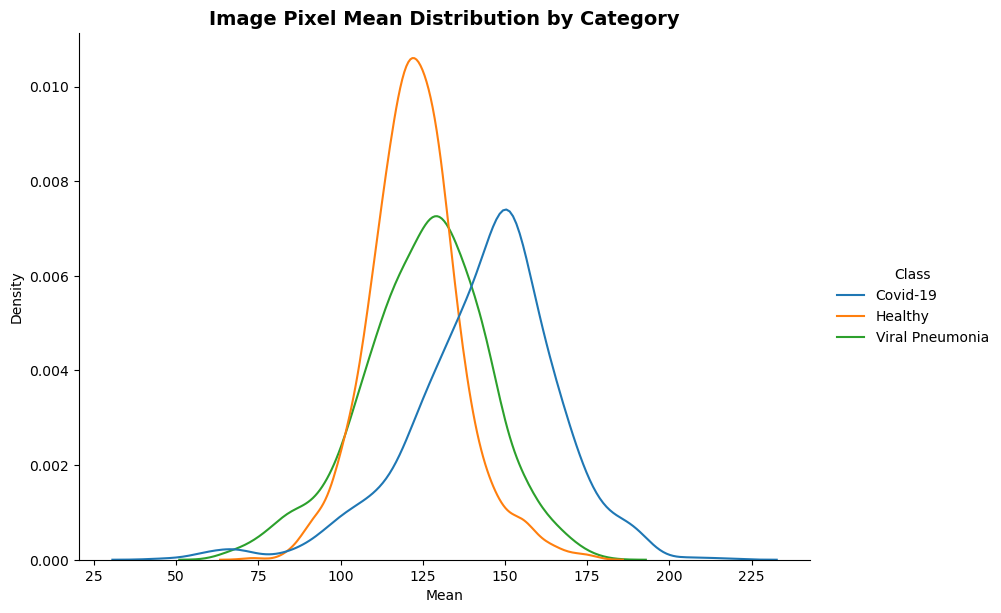

In [38]:
##################################
# Formulating the mean distribution
# by category of the image pixel values
##################################
sns.displot(data = imageEDA, x = 'Mean', kind="kde", hue = 'Class', height=6, aspect=1.40)
plt.title('Image Pixel Mean Distribution by Category', fontsize=14, weight='bold');

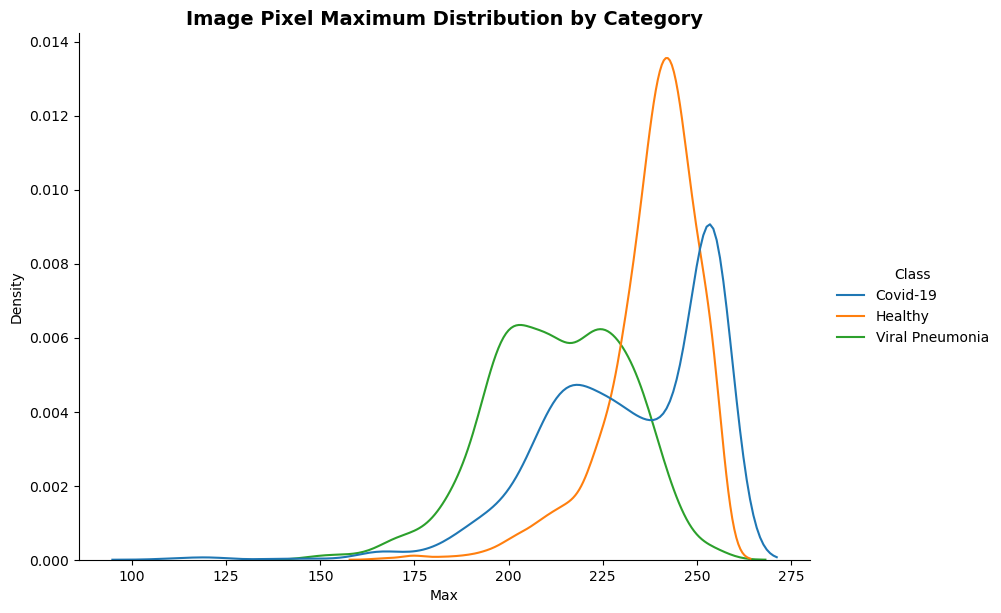

In [39]:
##################################
# Formulating the maximum distribution
# by category of the image pixel values
##################################
sns.displot(data = imageEDA, x = 'Max', kind="kde", hue = 'Class', height=6, aspect=1.40)
plt.title('Image Pixel Maximum Distribution by Category', fontsize=14, weight='bold');

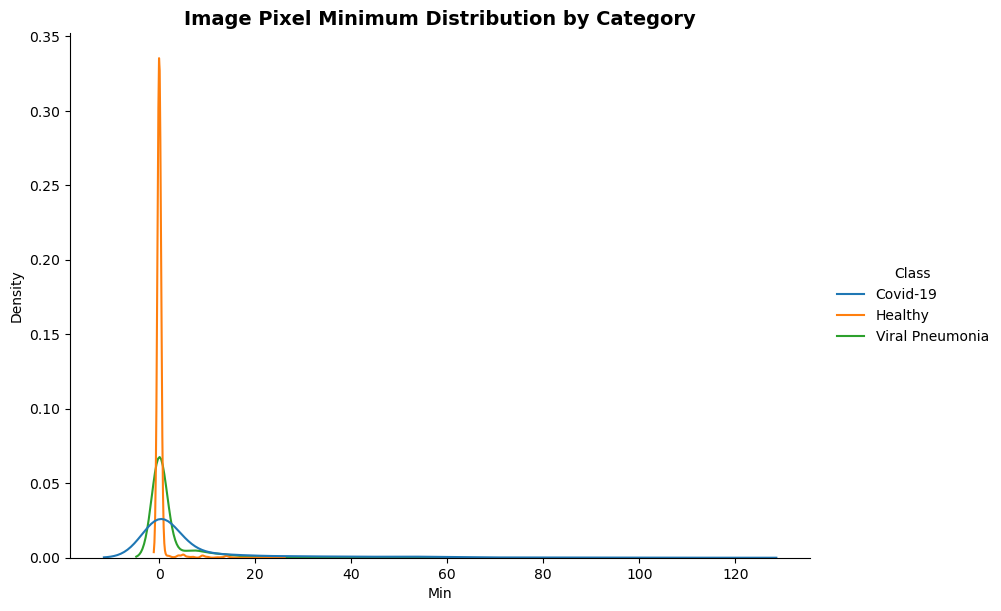

In [40]:
##################################
# Formulating the minimum distribution
# by category of the image pixel values
##################################
sns.displot(data = imageEDA, x = 'Min', kind="kde", hue = 'Class', height=6, aspect=1.40)
plt.title('Image Pixel Minimum Distribution by Category', fontsize=14, weight='bold');

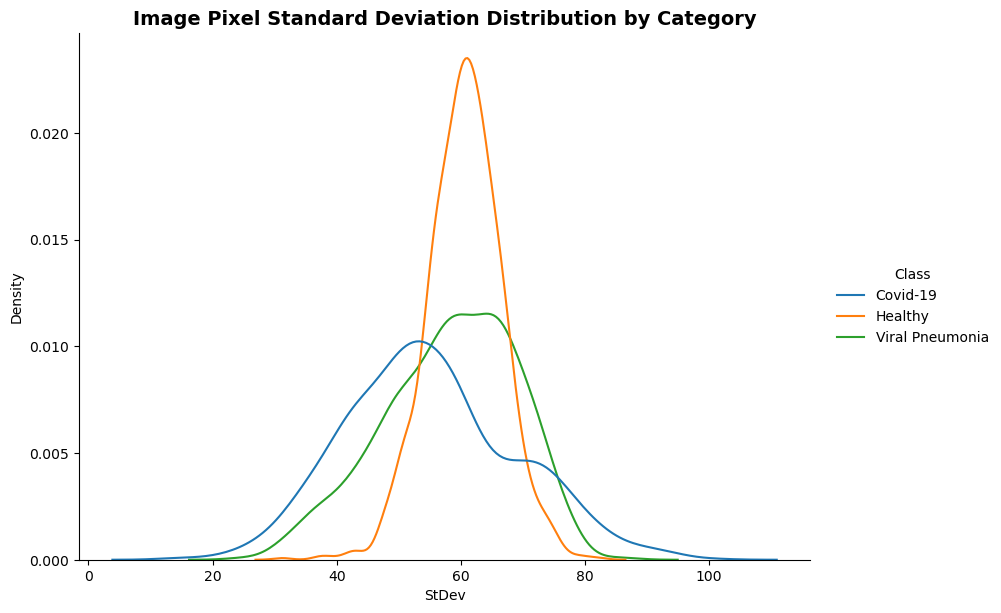

In [41]:
##################################
# Formulating the standard deviation distribution
# by category of the image pixel values
##################################
sns.displot(data = imageEDA, x = 'StDev', kind="kde", hue = 'Class', height=6, aspect=1.40)
plt.title('Image Pixel Standard Deviation Distribution by Category', fontsize=14, weight='bold');

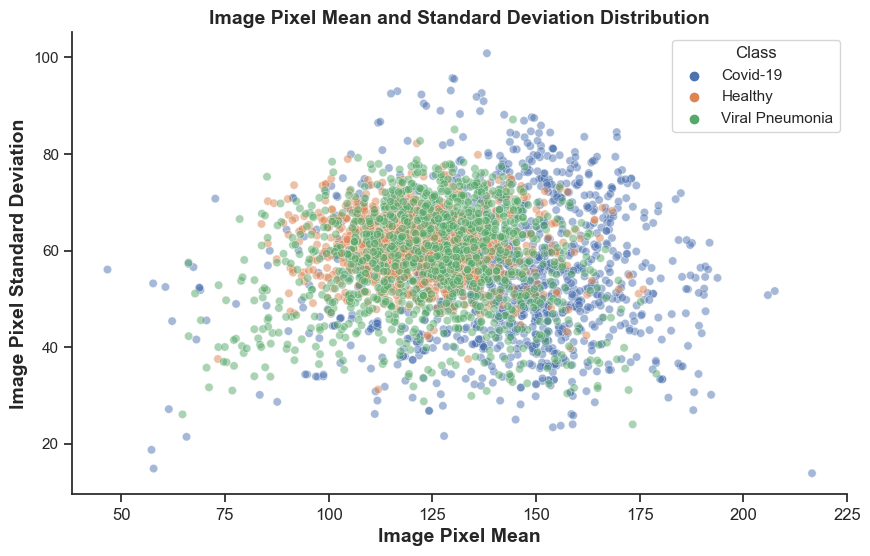

In [42]:
##################################
# Formulating the mean and standard deviation 
# scatterplot distribution
# by category of the image pixel values
##################################
plt.figure(figsize=(10,6))
sns.set(style="ticks", font_scale = 1)
ax = sns.scatterplot(data=imageEDA, x="Mean", y=imageEDA['StDev'], hue='Class', alpha=0.5)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.xticks(rotation=0, fontsize = 12)
ax.set_xlabel('Image Pixel Mean',fontsize=14, weight='bold')
ax.set_ylabel('Image Pixel Standard Deviation', fontsize=14, weight='bold')
plt.title('Image Pixel Mean and Standard Deviation Distribution', fontsize = 14, weight='bold');

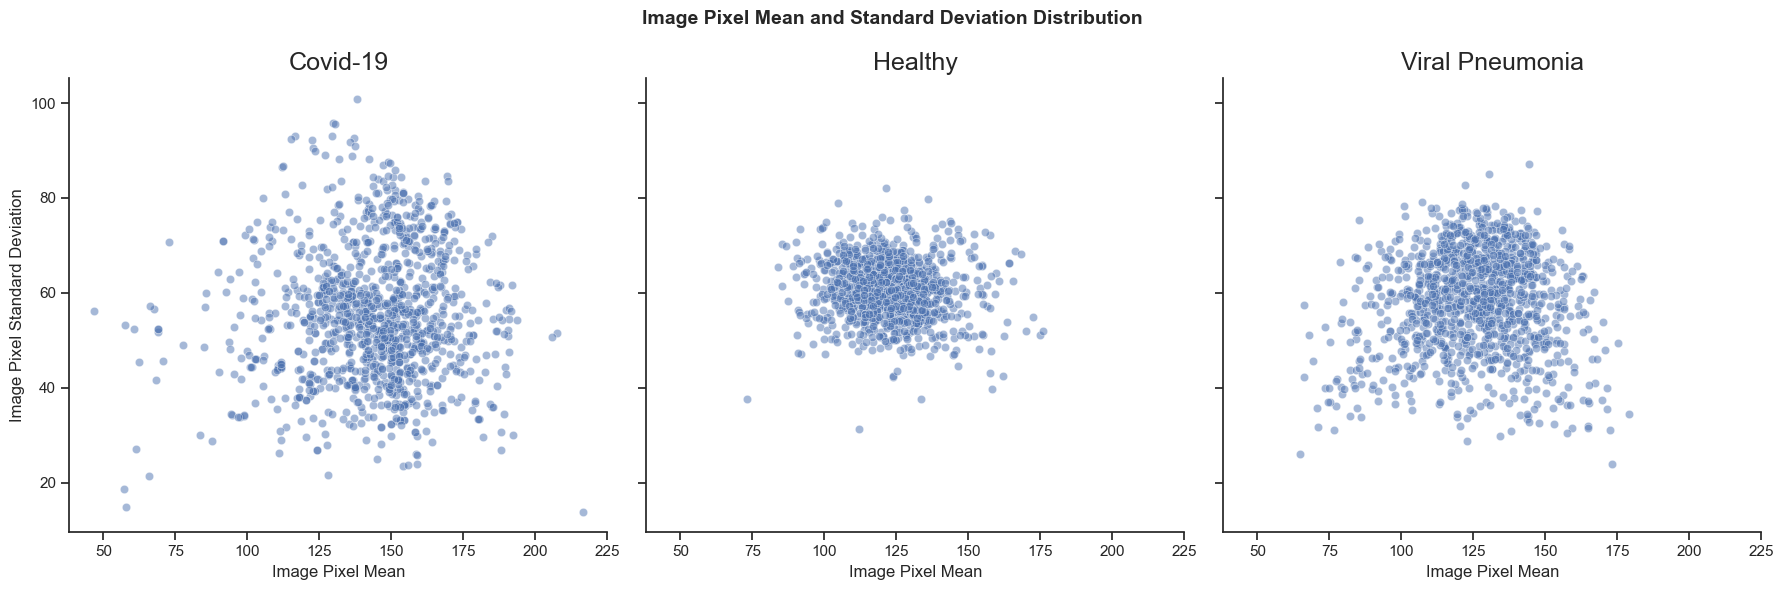

In [43]:
##################################
# Formulating the mean and standard deviation 
# scatterplot distribution
# by category of the image pixel values
##################################
scatterplot = sns.FacetGrid(imageEDA, col="Class", height=6)
scatterplot.map_dataframe(sns.scatterplot, x='Mean', y='StDev', alpha=0.5)
scatterplot.set_titles(col_template="{col_name}", row_template="{row_name}", size=18)
scatterplot.fig.subplots_adjust(top=.8)
scatterplot.fig.suptitle('Image Pixel Mean and Standard Deviation Distribution', fontsize=14, weight='bold')
axes = scatterplot.axes.flatten()
axes[0].set_ylabel('Image Pixel Standard Deviation')
for ax in axes:
    ax.set_xlabel('Image Pixel Mean')
scatterplot.fig.tight_layout()

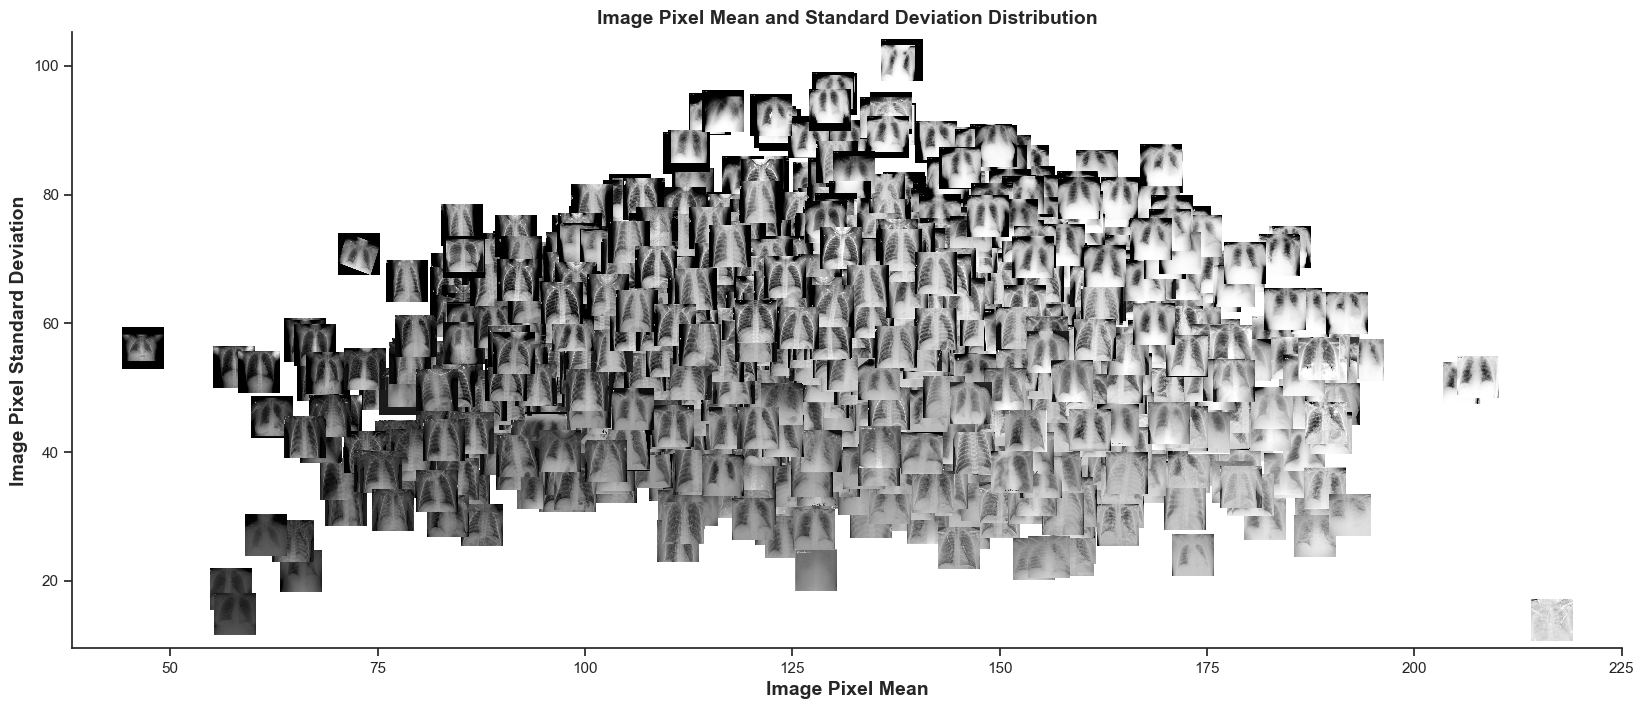

In [44]:
##################################
# Formulating the mean and standard deviation 
# scatterplot distribution
# of the image pixel values
# represented as actual images
##################################
def getImage(path):
    return OffsetImage(cv2.imread(path),zoom = 0.1)

DF_sample = imageEDA.sample(frac=1.0, replace=False, random_state=1)
paths = DF_sample['Path']

fig, ax = plt.subplots(figsize=(20,8))
ab = sns.scatterplot(data=DF_sample, x="Mean", y='StDev')
sns.despine(top=True, right=True, left=False, bottom=False)
ax.set_xlabel('Image Pixel Mean', fontsize=14, weight='bold')
ax.set_ylabel('Image Pixel Standard Deviation', fontsize=14, weight='bold')
plt.title('Image Pixel Mean and Standard Deviation Distribution', fontsize=14, weight='bold');

for x0, y0, path in zip(DF_sample['Mean'], DF_sample['StDev'],paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)

## 1.6. Model Development <a class="anchor" id="1.6"></a>

### 1.6.1 Premodelling Data Description <a class="anchor" id="1.6.1"></a>

1. Details
    * 1.1 Details
        * 1.1.1 Details
            * 1.1.1.1 Details

### 1.6.2 CNN With No Regularization <a class="anchor" id="1.6.2"></a>

1. Details
    * 1.1 Details
        * 1.1.1 Details
            * 1.1.1.1 Details

In [45]:
##################################
# Defining a function for
# plotting the loss profile
# of the training and validation sets
#################################
def plot_training_history(history, model_name):
    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f'{model_name} Training Loss', fontsize = 16, weight = 'bold', pad=20)
    plt.ylim(0, 5)
    plt.xlabel('Epoch', fontsize = 14, weight = 'bold',)
    plt.ylabel('Loss', fontsize = 14, weight = 'bold',)
    plt.legend()
    plt.show()

In [46]:
##################################
# Formulating the network architecture
# for CNN with no regularization
##################################
set_seed()
batch_size = 16
model_nr = Sequential()
model_nr.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding = 'Same', input_shape=(299, 299, 1)))
model_nr.add(MaxPooling2D(pool_size=(2, 2)))
model_nr.add(Conv2D(64, kernel_size=(3, 3), padding = 'Same', activation='relu'))
model_nr.add(MaxPooling2D(pool_size=(2, 2)))
model_nr.add(Flatten())
model_nr.add(Dense(128, activation='relu'))
model_nr.add(Dense(num_classes, activation='softmax'))

##################################
# Compiling the network layers
##################################
model_nr.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[Recall()])

In [47]:
##################################
# Displaying the model summary
# for CNN with no regularization
##################################
print(model_nr.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 299, 299, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 149, 149, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 128)               4

In [48]:
##################################
# Displaying the model layers
# for CNN with no regularization
##################################
model_nr_layer_names = [layer.name for layer in model_nr.layers]
print("Layer Names:", model_nr_layer_names)

Layer Names: ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']


In [49]:
##################################
# Displaying the number of weights
# for each model layer
# for CNN with no regularization
##################################
for layer in model_nr.layers:
    if hasattr(layer, 'weights'):
        print(f"Layer: {layer.name}, Number of Weights: {len(layer.get_weights())}")

Layer: conv2d, Number of Weights: 2
Layer: max_pooling2d, Number of Weights: 0
Layer: conv2d_1, Number of Weights: 2
Layer: max_pooling2d_1, Number of Weights: 0
Layer: flatten, Number of Weights: 0
Layer: dense, Number of Weights: 2
Layer: dense_1, Number of Weights: 2


In [50]:
##################################
# Displaying the number of weights
# for each model layer
# for CNN with no regularization
##################################
total_parameters = 0
for layer in model_nr.layers:
    layer_parameters = layer.count_params()
    total_parameters += layer_parameters
    print(f"Layer: {layer.name}, Parameters: {layer_parameters}")
print("\nTotal Parameters in the Model:", total_parameters)

Layer: conv2d, Parameters: 320
Layer: max_pooling2d, Parameters: 0
Layer: conv2d_1, Parameters: 18496
Layer: max_pooling2d_1, Parameters: 0
Layer: flatten, Parameters: 0
Layer: dense, Parameters: 44859520
Layer: dense_1, Parameters: 387

Total Parameters in the Model: 44878723


In [51]:
##################################
# Fitting the model
# for CNN with no regularization
##################################
epochs = 100
set_seed()
model_nr_history = model_nr.fit(train_gen, 
                                steps_per_epoch=len(train_gen) // batch_size,   
                                validation_steps=len(test_gen) // batch_size, 
                                validation_data=test_gen, 
                                epochs=epochs,
                                verbose=0)

In [52]:
##################################
# Evaluating the model
# for CNN with no regularization
# on the independent validation set
##################################
model_nr_y_pred = model_nr.predict(test_gen)

45/45 [==============================] - 4s 81ms/step


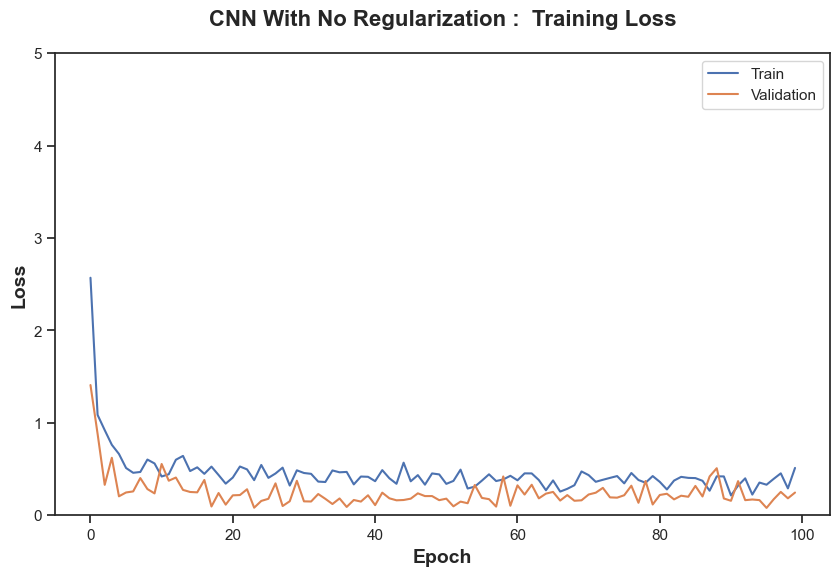

In [53]:
##################################
# Plotting the loss profile
# for CNN with no regularization
# on the training and validation sets
##################################
plot_training_history(model_nr_history, 'CNN With No Regularization : ')

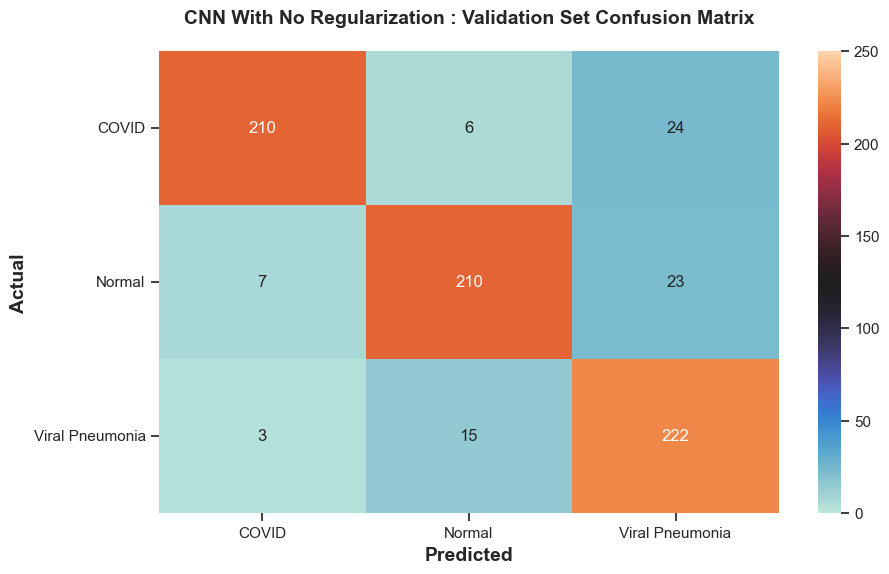

In [54]:
##################################
# Consolidating the predictions
# for CNN with no regularization
# on the validation set
##################################
model_nr_predictions = np.array(list(map(lambda x: np.argmax(x), model_nr_y_pred)))
model_nr_y_true = test_gen.classes

##################################
# Formulating the confusion matrix
# for CNN with no regularization
# on the validation set
##################################
CMatrix = pd.DataFrame(confusion_matrix(model_nr_y_true, model_nr_predictions), columns=classes, index =classes)

##################################
# Plotting the confusion matrix
# for CNN with no regularization
# on the validation set
##################################
plt.figure(figsize=(10, 6))
ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'icefire')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0)
ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0)
ax.set_title('CNN With No Regularization : Validation Set Confusion Matrix',fontsize = 14, weight = 'bold',pad=20);

##################################
# Resetting all states generated by Keras
##################################
keras.backend.clear_session()

In [55]:
##################################
# Calculating the model accuracy
# for CNN with no regularization
# for the entire validation set
##################################
model_nr_acc = accuracy_score(model_nr_y_true, model_nr_predictions)

##################################
# Calculating the model 
# Precision, Recall, F-score and Support
# for CNN with no regularization
# for the entire validation set
##################################
model_nr_results_all = precision_recall_fscore_support(model_nr_y_true, model_nr_predictions, average='macro',zero_division = 1)

##################################
# Calculating the model 
# Precision, Recall, F-score and Support
# for CNN with no regularization
# for each category of the validation set
##################################
model_nr_results_class = precision_recall_fscore_support(model_nr_y_true, model_nr_predictions, average=None, zero_division = 1)

##################################
# Consolidating all model evaluation metrics 
# for CNN with no regularization
##################################
metric_columns = ['Precision','Recall','F-Score','Support']
model_nr_all_df = pd.concat([pd.DataFrame(list(model_nr_results_class)).T,pd.DataFrame(list(model_nr_results_all)).T])
model_nr_all_df.columns = metric_columns
model_nr_all_df.index = ['COVID', 'Normal', 'Viral Pneumonia','Total']
model_nr_all_df

,Precision,Recall,F-Score,Support
COVID,0.954545,0.875000,0.913043,240.0
Normal,0.909091,0.875000,0.891720,240.0
Viral Pneumonia,0.825279,0.925000,0.872299,240.0
Total,0.896305,0.891667,0.892354,NaN


In [56]:
##################################
# Consolidating all model evaluation metrics 
# for CNN with no regularization
##################################
model_nr_model_list = []
model_nr_measure_list = []
model_nr_category_list = []
model_nr_value_list = []

for i in range(3): 
    for j in range(4):
        model_nr_model_list.append('CNN_NR')
        model_nr_measure_list.append(metric_columns[i])
        model_nr_category_list.append(model_nr_all_df.index[j])
        model_nr_value_list.append(model_nr_all_df.iloc[j,i])

model_nr_all_summary = pd.DataFrame(zip(model_nr_model_list,
                                        model_nr_measure_list,
                                        model_nr_category_list,
                                        model_nr_value_list), 
                                        columns=['CNN.Model.Name',
                                                 'Model.Metric',
                                                 'Image.Category',
                                                 'Metric.Value'])

### 1.6.3 CNN With Dropout Regularization <a class="anchor" id="1.6.3"></a>

1. Details
    * 1.1 Details
        * 1.1.1 Details
            * 1.1.1.1 Details    

In [57]:
##################################
# Formulating the network architecture
# for CNN with dropout regularization
##################################
set_seed()
batch_size = 16
model_dr = Sequential()
model_dr.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding = 'Same', input_shape=(299, 299, 1)))
model_dr.add(MaxPooling2D(pool_size=(2, 2)))
model_dr.add(Conv2D(64, kernel_size=(3, 3), padding = 'Same', activation='relu'))
model_dr.add(Dropout(0.25))
model_dr.add(MaxPooling2D(pool_size=(2, 2)))
model_dr.add(Flatten())
model_dr.add(Dense(128, activation='relu'))
model_dr.add(Dense(num_classes, activation='softmax'))

##################################
# Compiling the network layers
##################################
model_dr.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[Recall()])

In [58]:
##################################
# Displaying the model summary
# for CNN with dropout regularization
##################################
print(model_dr.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 299, 299, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 149, 149, 64)      18496     
                                                                 
 dropout (Dropout)           (None, 149, 149, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 350464)            0

In [59]:
##################################
# Displaying the model layers
# for CNN with dropout regularization
##################################
model_dr_layer_names = [layer.name for layer in model_dr.layers]
print("Layer Names:", model_dr_layer_names)

Layer Names: ['conv2d', 'max_pooling2d', 'conv2d_1', 'dropout', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']


In [60]:
##################################
# Displaying the number of weights
# for each model layer
# for CNN with dropout regularization
##################################
for layer in model_dr.layers:
    if hasattr(layer, 'weights'):
        print(f"Layer: {layer.name}, Number of Weights: {len(layer.get_weights())}")

Layer: conv2d, Number of Weights: 2
Layer: max_pooling2d, Number of Weights: 0
Layer: conv2d_1, Number of Weights: 2
Layer: dropout, Number of Weights: 0
Layer: max_pooling2d_1, Number of Weights: 0
Layer: flatten, Number of Weights: 0
Layer: dense, Number of Weights: 2
Layer: dense_1, Number of Weights: 2


In [61]:
##################################
# Displaying the number of weights
# for each model layer
# for CNN with dropout regularization
##################################
total_parameters = 0
for layer in model_dr.layers:
    layer_parameters = layer.count_params()
    total_parameters += layer_parameters
    print(f"Layer: {layer.name}, Parameters: {layer_parameters}")
print("\nTotal Parameters in the Model:", total_parameters)

Layer: conv2d, Parameters: 320
Layer: max_pooling2d, Parameters: 0
Layer: conv2d_1, Parameters: 18496
Layer: dropout, Parameters: 0
Layer: max_pooling2d_1, Parameters: 0
Layer: flatten, Parameters: 0
Layer: dense, Parameters: 44859520
Layer: dense_1, Parameters: 387

Total Parameters in the Model: 44878723


In [62]:
##################################
# Fitting the model
# for CNN with dropout regularization
##################################
epochs = 100
set_seed()
model_dr_history = model_dr.fit(train_gen, 
                                steps_per_epoch=len(train_gen) // batch_size, 
                                validation_steps=len(test_gen) // batch_size, 
                                validation_data=test_gen, 
                                epochs=epochs,
                                verbose=0)

In [63]:
##################################
# Evaluating the model
# for CNN with dropout regularization
# on the independent validation set
##################################
model_dr_y_pred = model_dr.predict(test_gen)

45/45 [==============================] - 3s 71ms/step


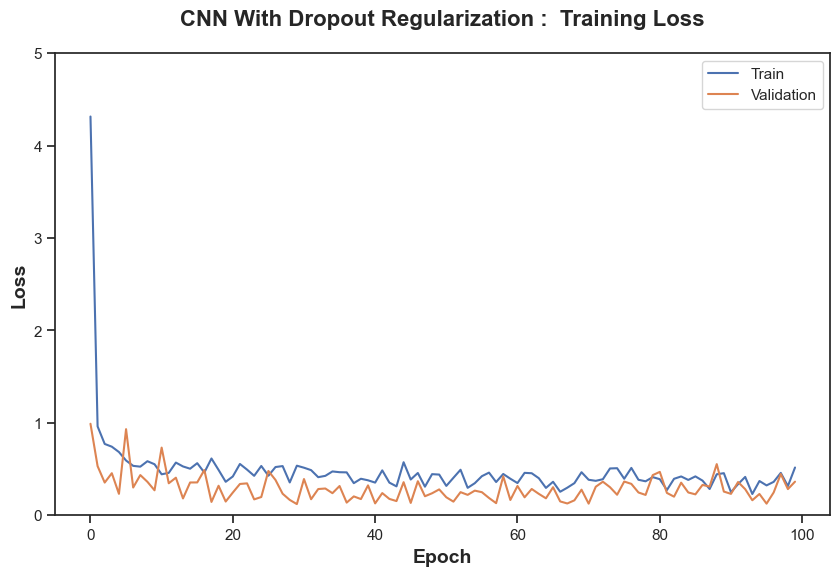

In [64]:
##################################
# Plotting the loss profile
# for CNN with dropout regularization
# on the training and validation sets
##################################
plot_training_history(model_dr_history, 'CNN With Dropout Regularization : ')

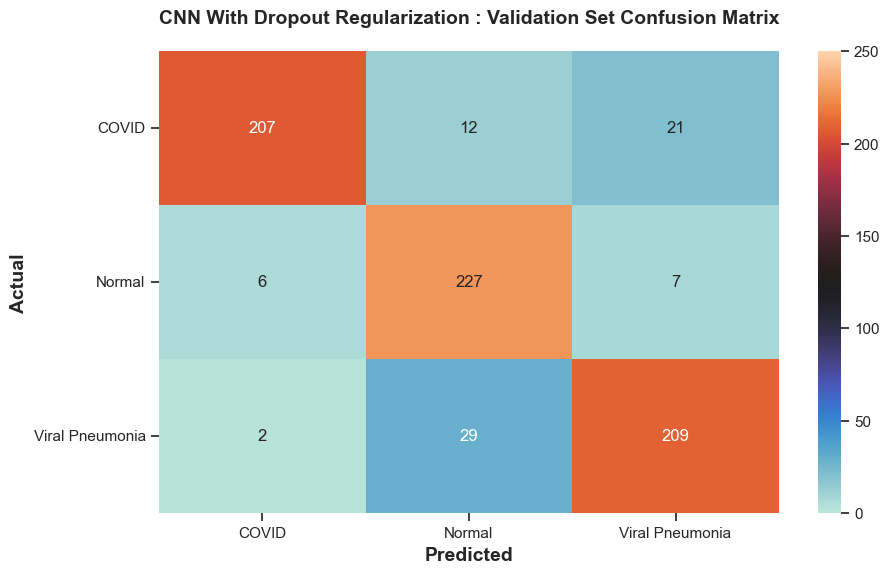

In [65]:
##################################
# Consolidating the predictions
# for CNN with dropout regularization
# on the validation set
##################################
model_dr_predictions = np.array(list(map(lambda x: np.argmax(x), model_dr_y_pred)))
model_dr_y_true=test_gen.classes

##################################
# Formulating the confusion matrix
# for CNN with dropout regularization
# on the validation set
##################################
CMatrix = pd.DataFrame(confusion_matrix(model_dr_y_true, model_dr_predictions), columns=classes, index =classes)

##################################
# Calculating the model 
# Precision, Recall, F-score and Support
# for CNN with dropout regularization
# for each category of the validation set
##################################
plt.figure(figsize=(10, 6))
ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 250, cmap = 'icefire')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0)
ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0)
ax.set_title('CNN With Dropout Regularization : Validation Set Confusion Matrix',fontsize = 14, weight = 'bold', pad=20);

##################################
# Resetting all states generated by Keras
##################################
keras.backend.clear_session()

In [66]:
##################################
# Calculating the model accuracy
# for CNN with dropout regularization
# for the entire validation set
##################################
model_dr_acc = accuracy_score(model_dr_y_true, model_dr_predictions)

##################################
# Calculating the model 
# Precision, Recall, F-score and Support
# for CNN with dropout regularization
# for the entire validation set
##################################
model_dr_results_all = precision_recall_fscore_support(model_dr_y_true, model_dr_predictions, average='macro',zero_division = 1)

##################################
# Calculating the model 
# Precision, Recall, F-score and Support
# for CNN with dropout regularization
# for each category of the validation set
##################################
model_dr_results_class = precision_recall_fscore_support(model_dr_y_true, model_dr_predictions, average=None, zero_division = 1)

##################################
# Consolidating all model evaluation metrics 
# for CNN with dropout regularization
##################################
metric_columns = ['Precision','Recall', 'F-Score','Support']
model_dr_all_df = pd.concat([pd.DataFrame(list(model_dr_results_class)).T,pd.DataFrame(list(model_dr_results_all)).T])
model_dr_all_df.columns = metric_columns
model_dr_all_df.index = ['COVID', 'Normal', 'Viral Pneumonia','Total']
model_dr_all_df

,Precision,Recall,F-Score,Support
COVID,0.962791,0.862500,0.909890,240.0
Normal,0.847015,0.945833,0.893701,240.0
Viral Pneumonia,0.881857,0.870833,0.876310,240.0
Total,0.897221,0.893056,0.893300,NaN


In [67]:
##################################
# Consolidating all model evaluation metrics 
# for CNN with dropout regularization
##################################
model_dr_model_list = []
model_dr_measure_list = []
model_dr_category_list = []
model_dr_value_list = []

for i in range(3): 
    for j in range(4):
        model_dr_model_list.append('CNN_DR')
        model_dr_measure_list.append(metric_columns[i])
        model_dr_category_list.append(model_dr_all_df.index[j])
        model_dr_value_list.append(model_dr_all_df.iloc[j,i])

model_dr_all_summary = pd.DataFrame(zip(model_dr_model_list,
                                        model_dr_measure_list,
                                        model_dr_category_list,
                                        model_dr_value_list), 
                                        columns=['CNN.Model.Name',
                                                 'Model.Metric',
                                                 'Image.Category',
                                                 'Metric.Value'])

### 1.6.4 CNN With Batch Normalization Regularization <a class="anchor" id="1.6.4"></a>

1. Details
    * 1.1 Details
        * 1.1.1 Details
            * 1.1.1.1 Details  

In [68]:
##################################
# Formulating the network architecture
# for CNN with batch normalization regularization
##################################
set_seed()
batch_size = 16
model_bnr = Sequential()
model_bnr.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding = 'Same', input_shape=(299, 299, 1)))
model_bnr.add(MaxPooling2D(pool_size=(2, 2)))
model_bnr.add(Conv2D(64, kernel_size=(3, 3), padding = 'Same', activation='relu'))
model_bnr.add(BatchNormalization())
model_bnr.add(Activation('relu'))
model_bnr.add(MaxPooling2D(pool_size=(2, 2)))
model_bnr.add(Flatten())
model_bnr.add(Dense(128, activation='relu'))
model_bnr.add(Dense(num_classes, activation='softmax'))

##################################
# Compiling the network layers
##################################
model_bnr.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[Recall()])

In [69]:
##################################
# Displaying the model summary
# for CNN with batch normalization regularization
##################################
print(model_bnr.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 299, 299, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 149, 149, 64)      18496     
                                                                 
 batch_normalization (BatchN  (None, 149, 149, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 149, 149, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 64)       0

In [70]:
##################################
# Displaying the model layers
# for CNN with batch normalization regularization
##################################
model_bnr_layer_names = [layer.name for layer in model_bnr.layers]
print("Layer Names:", model_bnr_layer_names)

Layer Names: ['conv2d', 'max_pooling2d', 'conv2d_1', 'batch_normalization', 'activation', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']


In [71]:
##################################
# Displaying the number of weights
# for each model layer
# for CNN with batch normalization regularization
##################################
for layer in model_bnr.layers:
    if hasattr(layer, 'weights'):
        print(f"Layer: {layer.name}, Number of Weights: {len(layer.get_weights())}")

Layer: conv2d, Number of Weights: 2
Layer: max_pooling2d, Number of Weights: 0
Layer: conv2d_1, Number of Weights: 2
Layer: batch_normalization, Number of Weights: 4
Layer: activation, Number of Weights: 0
Layer: max_pooling2d_1, Number of Weights: 0
Layer: flatten, Number of Weights: 0
Layer: dense, Number of Weights: 2
Layer: dense_1, Number of Weights: 2


In [72]:
##################################
# Displaying the number of weights
# for each model layer
# for CNN with batch normalization regularization
##################################
total_parameters = 0
for layer in model_bnr.layers:
    layer_parameters = layer.count_params()
    total_parameters += layer_parameters
    print(f"Layer: {layer.name}, Parameters: {layer_parameters}")
print("\nTotal Parameters in the Model:", total_parameters)

Layer: conv2d, Parameters: 320
Layer: max_pooling2d, Parameters: 0
Layer: conv2d_1, Parameters: 18496
Layer: batch_normalization, Parameters: 256
Layer: activation, Parameters: 0
Layer: max_pooling2d_1, Parameters: 0
Layer: flatten, Parameters: 0
Layer: dense, Parameters: 44859520
Layer: dense_1, Parameters: 387

Total Parameters in the Model: 44878979


In [73]:
##################################
# Fitting the model
# for CNN with batch normalization regularization
##################################
epochs = 100
set_seed()
model_bnr_history = model_bnr.fit(train_gen, 
                                  steps_per_epoch=len(train_gen) // batch_size,
                                  validation_steps=len(test_gen) // batch_size, 
                                  validation_data=test_gen, epochs=epochs,
                                  verbose=0)

In [74]:
##################################
# Evaluating the model
# for CNN with batch normalization regularization
# on the independent validation set
##################################
model_bnr_y_pred = model_bnr.predict(test_gen)

45/45 [==============================] - 4s 79ms/step


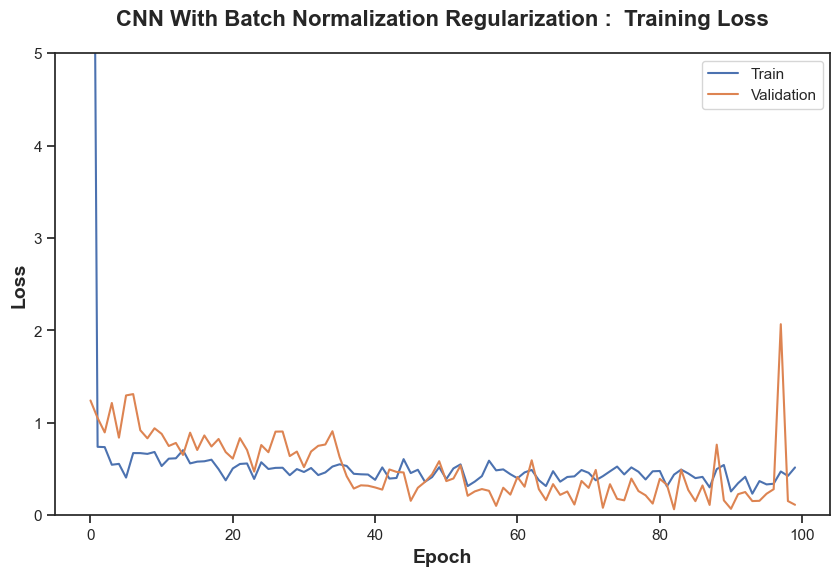

In [75]:
##################################
# Plotting the loss profile
# for CNN with batch normalization regularization
# on the training and validation sets
##################################
plot_training_history(model_bnr_history, 'CNN With Batch Normalization Regularization : ')

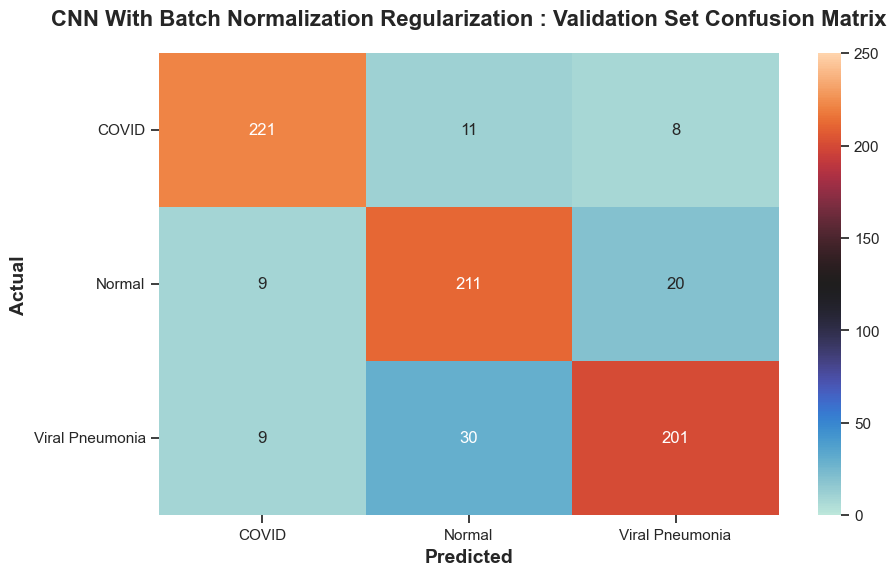

In [76]:
##################################
# Consolidating the predictions
# for CNN with batch normalization regularization
# on the validation set
##################################
model_bnr_predictions = np.array(list(map(lambda x: np.argmax(x), model_bnr_y_pred)))
model_bnr_y_true = test_gen.classes

##################################
# Formulating the confusion matrix
# for CNN with batch normalization regularization
# on the validation set
##################################
CMatrix = pd.DataFrame(confusion_matrix(model_bnr_y_true, model_bnr_predictions), columns=classes, index =classes)

##################################
# Calculating the model 
# Precision, Recall, F-score and Support
# for CNN with batch normalization regularization
# for each category of the validation set
##################################
plt.figure(figsize=(10, 6))
ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'icefire')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0)
ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0)
ax.set_title('CNN With Batch Normalization Regularization : Validation Set Confusion Matrix',fontsize = 16,weight = 'bold',pad=20);

##################################
# Resetting all states generated by Keras
##################################
keras.backend.clear_session()

In [77]:
##################################
# Calculating the model accuracy
# for CNN with batch normalization regularization
# for the entire validation set
##################################
model_bnr_acc = accuracy_score(model_bnr_y_true, model_bnr_predictions)

##################################
# Calculating the model 
# Precision, Recall, F-score and Support
# for CNN with batch normalization regularization
# for the entire validation set
##################################
model_bnr_results_all = precision_recall_fscore_support(model_bnr_y_true, model_bnr_predictions, average='macro',zero_division = 1)

##################################
# Calculating the model 
# Precision, Recall, F-score and Support
# for CNN with batch normalization regularization
# for each category of the validation set
##################################
model_bnr_results_class = precision_recall_fscore_support(model_bnr_y_true, model_bnr_predictions, average=None, zero_division = 1)

##################################
# Consolidating all model evaluation metrics 
# for CNN with batch normalization regularization
##################################
metric_columns = ['Precision','Recall', 'F-Score','Support']
model_bnr_all_df = pd.concat([pd.DataFrame(list(model_bnr_results_class)).T,pd.DataFrame(list(model_bnr_results_all)).T])
model_bnr_all_df.columns = metric_columns
model_bnr_all_df.index = ['COVID', 'Normal', 'Viral Pneumonia','Total']
model_bnr_all_df

,Precision,Recall,F-Score,Support
COVID,0.924686,0.920833,0.922756,240.0
Normal,0.837302,0.879167,0.857724,240.0
Viral Pneumonia,0.877729,0.837500,0.857143,240.0
Total,0.879906,0.879167,0.879207,NaN


In [78]:
##################################
# Consolidating all model evaluation metrics 
# for CNN with batch normalization regularization
##################################
model_bnr_model_list = []
model_bnr_measure_list = []
model_bnr_category_list = []
model_bnr_value_list = []

for i in range(3): 
    for j in range(4):
        model_bnr_model_list.append('CNN_BNR')
        model_bnr_measure_list.append(metric_columns[i])
        model_bnr_category_list.append(model_bnr_all_df.index[j])
        model_bnr_value_list.append(model_bnr_all_df.iloc[j,i])

model_bnr_all_summary = pd.DataFrame(zip(model_bnr_model_list,
                                        model_bnr_measure_list,
                                        model_bnr_category_list,
                                        model_bnr_value_list), 
                                        columns=['CNN.Model.Name',
                                                 'Model.Metric',
                                                 'Image.Category',
                                                 'Metric.Value'])

### 1.6.5 CNN With Dropout and Batch Normalization Regularization <a class="anchor" id="1.6.5"></a>

1. Details
    * 1.1 Details
        * 1.1.1 Details
            * 1.1.1.1 Details      

In [79]:
##################################
# Formulating the network architecture
# for CNN with dropout and batch normalization regularization
##################################
set_seed()
batch_size = 16
model_dr_bnr = Sequential()
model_dr_bnr.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding = 'Same', input_shape=(299, 299, 1)))
model_dr_bnr.add(MaxPooling2D(pool_size=(2, 2)))
model_dr_bnr.add(Conv2D(64, kernel_size=(3, 3), padding = 'Same', activation='relu'))
model_dr_bnr.add(BatchNormalization())
model_dr_bnr.add(Activation('relu'))
model_dr_bnr.add(Dropout(0.25))
model_dr_bnr.add(MaxPooling2D(pool_size=(2, 2)))
model_dr_bnr.add(Flatten())
model_dr_bnr.add(Dense(128, activation='relu'))
model_dr_bnr.add(Dense(num_classes, activation='softmax'))

##################################
# Compiling the network layers
##################################
model_dr_bnr.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[Recall()])

In [80]:
##################################
# Displaying the model summary
# for CNN with dropout and
# batch normalization regularization
##################################
print(model_dr_bnr.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 299, 299, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 149, 149, 64)      18496     
                                                                 
 batch_normalization (BatchN  (None, 149, 149, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 149, 149, 64)      0         
                                                                 
 dropout (Dropout)           (None, 149, 149, 64)      0

In [81]:
##################################
# Displaying the model layers
# for CNN with dropout and
# batch normalization regularization
##################################
model_dr_bnr_layer_names = [layer.name for layer in model_dr_bnr.layers]
print("Layer Names:", model_dr_bnr_layer_names)

Layer Names: ['conv2d', 'max_pooling2d', 'conv2d_1', 'batch_normalization', 'activation', 'dropout', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']


In [82]:
##################################
# Displaying the number of weights
# for CNN with dropout and
# batch normalization regularization
##################################
for layer in model_dr_bnr.layers:
    if hasattr(layer, 'weights'):
        print(f"Layer: {layer.name}, Number of Weights: {len(layer.get_weights())}")

Layer: conv2d, Number of Weights: 2
Layer: max_pooling2d, Number of Weights: 0
Layer: conv2d_1, Number of Weights: 2
Layer: batch_normalization, Number of Weights: 4
Layer: activation, Number of Weights: 0
Layer: dropout, Number of Weights: 0
Layer: max_pooling2d_1, Number of Weights: 0
Layer: flatten, Number of Weights: 0
Layer: dense, Number of Weights: 2
Layer: dense_1, Number of Weights: 2


In [83]:
##################################
# Displaying the number of weights
# for CNN with dropout and
# batch normalization regularization
##################################
total_parameters = 0
for layer in model_dr_bnr.layers:
    layer_parameters = layer.count_params()
    total_parameters += layer_parameters
    print(f"Layer: {layer.name}, Parameters: {layer_parameters}")
print("\nTotal Parameters in the Model:", total_parameters)

Layer: conv2d, Parameters: 320
Layer: max_pooling2d, Parameters: 0
Layer: conv2d_1, Parameters: 18496
Layer: batch_normalization, Parameters: 256
Layer: activation, Parameters: 0
Layer: dropout, Parameters: 0
Layer: max_pooling2d_1, Parameters: 0
Layer: flatten, Parameters: 0
Layer: dense, Parameters: 44859520
Layer: dense_1, Parameters: 387

Total Parameters in the Model: 44878979


In [84]:
##################################
# Fitting the model
# for CNN with dropout and
# batch normalization regularization
##################################
epochs = 100
set_seed()
model_dr_bnr_history = model_dr_bnr.fit(train_gen,
                                        steps_per_epoch=len(train_gen) // batch_size,
                                        validation_steps=len(test_gen) // batch_size, 
                                        validation_data=test_gen, 
                                        epochs=epochs,
                                        verbose=0)

In [85]:
##################################
# Evaluating the model
# for CNN with dropout and
# batch normalization regularization
# on the independent validation set
##################################
model_dr_bnr_y_pred = model_dr_bnr.predict(test_gen)

45/45 [==============================] - 4s 78ms/step


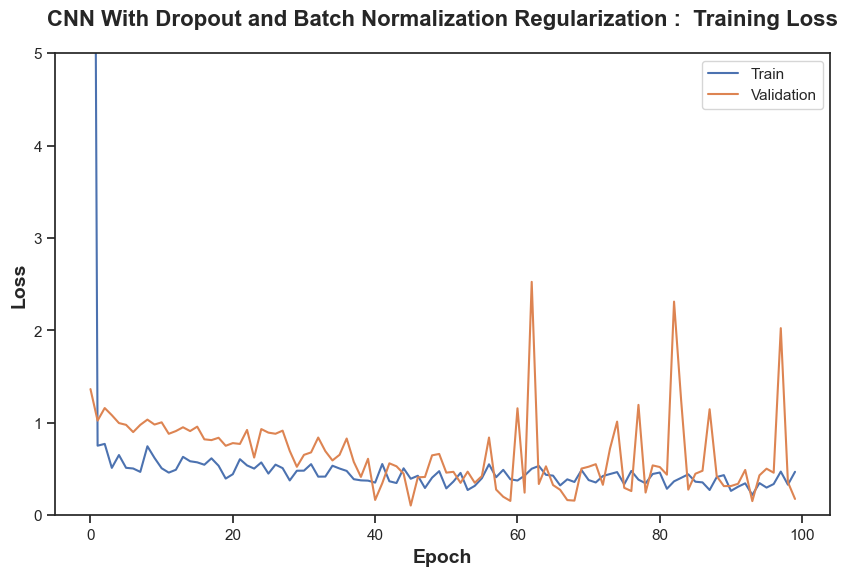

In [86]:
##################################
# Plotting the loss profile
# for CNN with dropout and
# batch normalization regularization
# on the training and validation sets
##################################
plot_training_history(model_dr_bnr_history, 'CNN With Dropout and Batch Normalization Regularization : ')

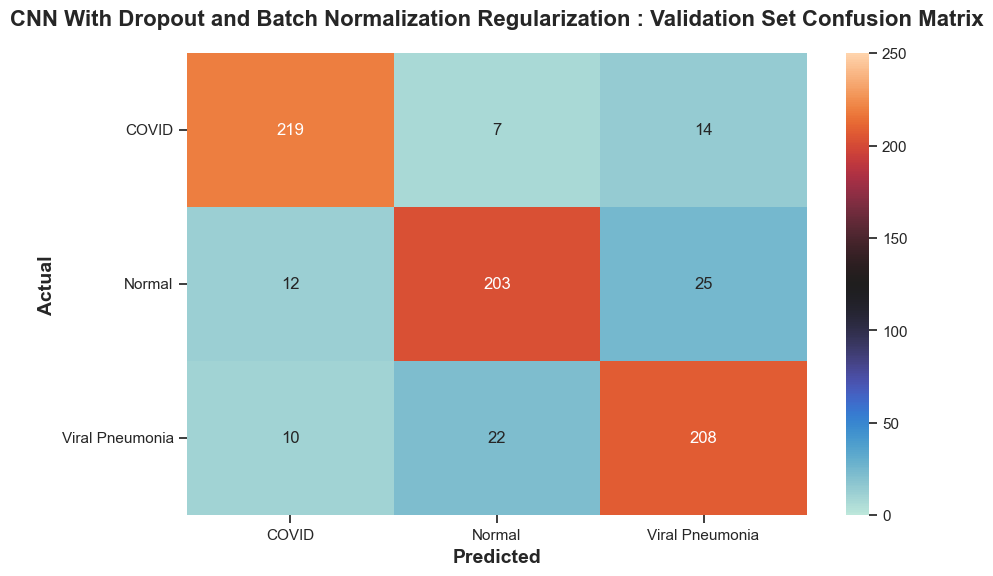

In [87]:
##################################
# Consolidating the predictions
# for CNN with dropout and
# batch normalization regularization
# on the validation set
##################################
model_dr_bnr_predictions = np.array(list(map(lambda x: np.argmax(x), model_dr_bnr_y_pred)))
model_dr_bnr_y_true = test_gen.classes

##################################
# Formulating the confusion matrix
# for CNN with dropout and
# batch normalization regularization
# on the validation set
##################################
CMatrix = pd.DataFrame(confusion_matrix(model_dr_bnr_y_true, model_dr_bnr_predictions), columns=classes, index =classes)

##################################
# Calculating the model 
# Precision, Recall, F-score and Support
# for CNN with dropout and
# batch normalization regularization
# for each category of the validation set
##################################
plt.figure(figsize=(10, 6))
ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'icefire')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0)
ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0)
ax.set_title('CNN With Dropout and Batch Normalization Regularization : Validation Set Confusion Matrix',fontsize = 16,weight = 'bold',pad=20);

##################################
# Resetting all states generated by Keras
##################################
keras.backend.clear_session()

In [88]:
##################################
# Calculating the model accuracy
# for CNN with dropout and
# batch normalization regularization
# for the entire validation set
##################################
model_dr_bnr_acc = accuracy_score(model_dr_bnr_y_true, model_dr_bnr_predictions)

##################################
# Calculating the model 
# Precision, Recall, F-score and Support
# for CNN with dropout and
# batch normalization regularization
# for the entire validation set
##################################
model_dr_bnr_results_all = precision_recall_fscore_support(model_dr_bnr_y_true, model_dr_bnr_predictions, average='macro',zero_division = 1)

##################################
# Calculating the model 
# Precision, Recall, F-score and Support
# for CNN with dropout and
# batch normalization regularization
# for each category of the validation set
##################################
model_dr_bnr_results_class = precision_recall_fscore_support(model_dr_bnr_y_true, model_dr_bnr_predictions, average=None, zero_division = 1)

##################################
# Consolidating all model evaluation metrics 
# for CNN with dropout and
# batch normalization regularization
##################################
metric_columns = ['Precision','Recall', 'F-Score','Support']
model_dr_bnr_all_df = pd.concat([pd.DataFrame(list(model_dr_bnr_results_class)).T,pd.DataFrame(list(model_dr_bnr_results_all)).T])
model_dr_bnr_all_df.columns = metric_columns
model_dr_bnr_all_df.index = ['COVID', 'Normal', 'Viral Pneumonia','Total']
model_dr_bnr_all_df

,Precision,Recall,F-Score,Support
COVID,0.908714,0.912500,0.910603,240.0
Normal,0.875000,0.845833,0.860169,240.0
Viral Pneumonia,0.842105,0.866667,0.854209,240.0
Total,0.875273,0.875000,0.874994,NaN


In [89]:
##################################
# Consolidating all model evaluation metrics 
# for CNN with dropout and
# batch normalization regularization
##################################
model_dr_bnr_model_list = []
model_dr_bnr_measure_list = []
model_dr_bnr_category_list = []
model_dr_bnr_value_list = []

for i in range(3): 
    for j in range(4):
        model_dr_bnr_model_list.append('CNN_DR_BNR')
        model_dr_bnr_measure_list.append(metric_columns[i])
        model_dr_bnr_category_list.append(model_dr_bnr_all_df.index[j])
        model_dr_bnr_value_list.append(model_dr_bnr_all_df.iloc[j,i])

model_dr_bnr_all_summary = pd.DataFrame(zip(model_dr_bnr_model_list,
                                            model_dr_bnr_measure_list,
                                            model_dr_bnr_category_list,
                                            model_dr_bnr_value_list), 
                                        columns=['CNN.Model.Name',
                                                 'Model.Metric',
                                                 'Image.Category',
                                                 'Metric.Value'])


## 1.7. Consolidated Findings <a class="anchor" id="1.7"></a>

1. Details
    * 1.1 Details
        * 1.1.1 Details
            * 1.1.1.1 Details         

In [90]:
##################################
# Consolidating all the
# CNN model performance measures
##################################
cnn_model_performance_comparison = pd.concat([model_nr_all_summary, 
                                              model_dr_all_summary,
                                              model_bnr_all_summary, 
                                              model_dr_bnr_all_summary], 
                                             ignore_index=True)

In [91]:
##################################
# Consolidating all the precision
# model performance measures
##################################
cnn_model_performance_comparison_precision = cnn_model_performance_comparison[cnn_model_performance_comparison['Model.Metric']=='Precision']
cnn_model_performance_comparison_precision_CNN_NR = cnn_model_performance_comparison_precision[cnn_model_performance_comparison_precision['CNN.Model.Name']=='CNN_NR'].loc[:,"Metric.Value"]
cnn_model_performance_comparison_precision_CNN_BR = cnn_model_performance_comparison_precision[cnn_model_performance_comparison_precision['CNN.Model.Name']=='CNN_DR'].loc[:,"Metric.Value"]
cnn_model_performance_comparison_precision_CNN_BNR = cnn_model_performance_comparison_precision[cnn_model_performance_comparison_precision['CNN.Model.Name']=='CNN_BNR'].loc[:,"Metric.Value"]
cnn_model_performance_comparison_precision_CNN_DR_BNR = cnn_model_performance_comparison_precision[cnn_model_performance_comparison_precision['CNN.Model.Name']=='CNN_DR_BNR'].loc[:,"Metric.Value"]

In [92]:
##################################
# Combining all the precision
# model performance measures
# for all CNN models
##################################
cnn_model_performance_comparison_precision_plot = pd.DataFrame({'CNN_NR': cnn_model_performance_comparison_precision_CNN_NR.values,
                                                                'CNN_BR': cnn_model_performance_comparison_precision_CNN_BR.values,
                                                                'CNN_BNR': cnn_model_performance_comparison_precision_CNN_BNR.values,
                                                                'CNN_DR_BNR': cnn_model_performance_comparison_precision_CNN_DR_BNR.values},
                                                               index=cnn_model_performance_comparison_precision['Image.Category'].unique())
cnn_model_performance_comparison_precision_plot

,CNN_NR,CNN_BR,CNN_BNR,CNN_DR_BNR
COVID,0.954545,0.962791,0.924686,0.908714
Normal,0.909091,0.847015,0.837302,0.875000
Viral Pneumonia,0.825279,0.881857,0.877729,0.842105
Total,0.896305,0.897221,0.879906,0.875273


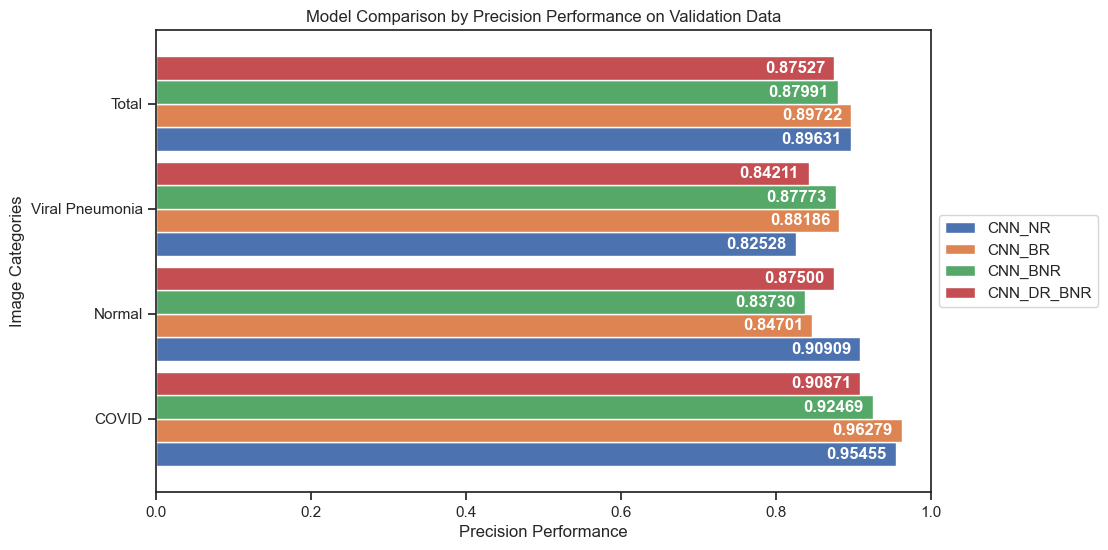

In [93]:
##################################
# Plotting all the precision
# model performance measures
# for all CNN models
##################################
cnn_model_performance_comparison_precision_plot = cnn_model_performance_comparison_precision_plot.plot.barh(figsize=(10, 6), width=0.90)
cnn_model_performance_comparison_precision_plot.set_xlim(0.00,1.00)
cnn_model_performance_comparison_precision_plot.set_title("Model Comparison by Precision Performance on Validation Data")
cnn_model_performance_comparison_precision_plot.set_xlabel("Precision Performance")
cnn_model_performance_comparison_precision_plot.set_ylabel("Image Categories")
cnn_model_performance_comparison_precision_plot.grid(False)
cnn_model_performance_comparison_precision_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for container in cnn_model_performance_comparison_precision_plot.containers:
    cnn_model_performance_comparison_precision_plot.bar_label(container, fmt='%.5f', padding=-50, color='white', fontweight='bold')

In [94]:
##################################
# Consolidating all the recall
# model performance measures
##################################
cnn_model_performance_comparison_recall = cnn_model_performance_comparison[cnn_model_performance_comparison['Model.Metric']=='Recall']
cnn_model_performance_comparison_recall_CNN_NR = cnn_model_performance_comparison_recall[cnn_model_performance_comparison_recall['CNN.Model.Name']=='CNN_NR'].loc[:,"Metric.Value"]
cnn_model_performance_comparison_recall_CNN_BR = cnn_model_performance_comparison_recall[cnn_model_performance_comparison_recall['CNN.Model.Name']=='CNN_DR'].loc[:,"Metric.Value"]
cnn_model_performance_comparison_recall_CNN_BNR = cnn_model_performance_comparison_recall[cnn_model_performance_comparison_recall['CNN.Model.Name']=='CNN_BNR'].loc[:,"Metric.Value"]
cnn_model_performance_comparison_recall_CNN_DR_BNR = cnn_model_performance_comparison_recall[cnn_model_performance_comparison_recall['CNN.Model.Name']=='CNN_DR_BNR'].loc[:,"Metric.Value"]

In [95]:
##################################
# Combining all the recall
# model performance measures
# for all CNN models
##################################
cnn_model_performance_comparison_recall_plot = pd.DataFrame({'CNN_NR': cnn_model_performance_comparison_recall_CNN_NR.values,
                                                             'CNN_BR': cnn_model_performance_comparison_recall_CNN_BR.values,
                                                             'CNN_BNR': cnn_model_performance_comparison_recall_CNN_BNR.values,
                                                             'CNN_DR_BNR': cnn_model_performance_comparison_recall_CNN_DR_BNR.values},
                                                            index=cnn_model_performance_comparison_recall['Image.Category'].unique())
cnn_model_performance_comparison_recall_plot

,CNN_NR,CNN_BR,CNN_BNR,CNN_DR_BNR
COVID,0.875000,0.862500,0.920833,0.912500
Normal,0.875000,0.945833,0.879167,0.845833
Viral Pneumonia,0.925000,0.870833,0.837500,0.866667
Total,0.891667,0.893056,0.879167,0.875000


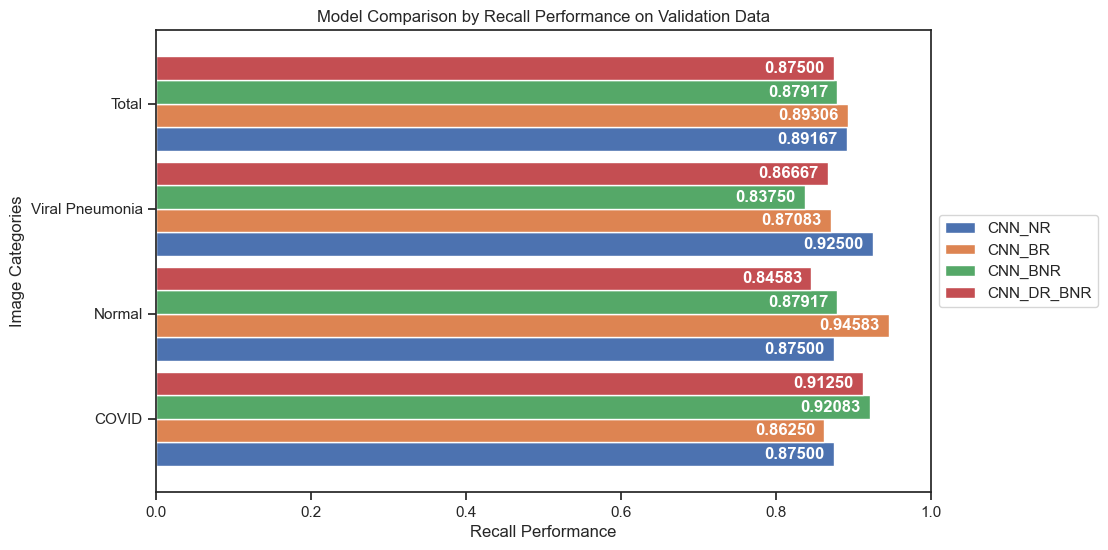

In [96]:
##################################
# Plotting all the recall
# model performance measures
# for all CNN models
##################################
cnn_model_performance_comparison_recall_plot = cnn_model_performance_comparison_recall_plot.plot.barh(figsize=(10, 6), width=0.90)
cnn_model_performance_comparison_recall_plot.set_xlim(0.00,1.00)
cnn_model_performance_comparison_recall_plot.set_title("Model Comparison by Recall Performance on Validation Data")
cnn_model_performance_comparison_recall_plot.set_xlabel("Recall Performance")
cnn_model_performance_comparison_recall_plot.set_ylabel("Image Categories")
cnn_model_performance_comparison_recall_plot.grid(False)
cnn_model_performance_comparison_recall_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for container in cnn_model_performance_comparison_recall_plot.containers:
    cnn_model_performance_comparison_recall_plot.bar_label(container, fmt='%.5f', padding=-50, color='white', fontweight='bold')

In [97]:
##################################
# Consolidating all the f-score
# model performance measures
##################################
cnn_model_performance_comparison_fscore = cnn_model_performance_comparison[cnn_model_performance_comparison['Model.Metric']=='F-Score']
cnn_model_performance_comparison_fscore_CNN_NR = cnn_model_performance_comparison_fscore[cnn_model_performance_comparison_fscore['CNN.Model.Name']=='CNN_NR'].loc[:,"Metric.Value"]
cnn_model_performance_comparison_fscore_CNN_BR = cnn_model_performance_comparison_fscore[cnn_model_performance_comparison_fscore['CNN.Model.Name']=='CNN_DR'].loc[:,"Metric.Value"]
cnn_model_performance_comparison_fscore_CNN_BNR = cnn_model_performance_comparison_fscore[cnn_model_performance_comparison_fscore['CNN.Model.Name']=='CNN_BNR'].loc[:,"Metric.Value"]
cnn_model_performance_comparison_fscore_CNN_DR_BNR = cnn_model_performance_comparison_fscore[cnn_model_performance_comparison_fscore['CNN.Model.Name']=='CNN_DR_BNR'].loc[:,"Metric.Value"]

In [98]:
##################################
# Combining all the f-score
# model performance measures
# for all CNN models
##################################
cnn_model_performance_comparison_fscore_plot = pd.DataFrame({'CNN_NR': cnn_model_performance_comparison_fscore_CNN_NR.values,
                                                             'CNN_BR': cnn_model_performance_comparison_fscore_CNN_BR.values,
                                                             'CNN_BNR': cnn_model_performance_comparison_fscore_CNN_BNR.values,
                                                             'CNN_DR_BNR': cnn_model_performance_comparison_fscore_CNN_DR_BNR.values},
                                                            index=cnn_model_performance_comparison_fscore['Image.Category'].unique())
cnn_model_performance_comparison_fscore_plot

,CNN_NR,CNN_BR,CNN_BNR,CNN_DR_BNR
COVID,0.913043,0.909890,0.922756,0.910603
Normal,0.891720,0.893701,0.857724,0.860169
Viral Pneumonia,0.872299,0.876310,0.857143,0.854209
Total,0.892354,0.893300,0.879207,0.874994


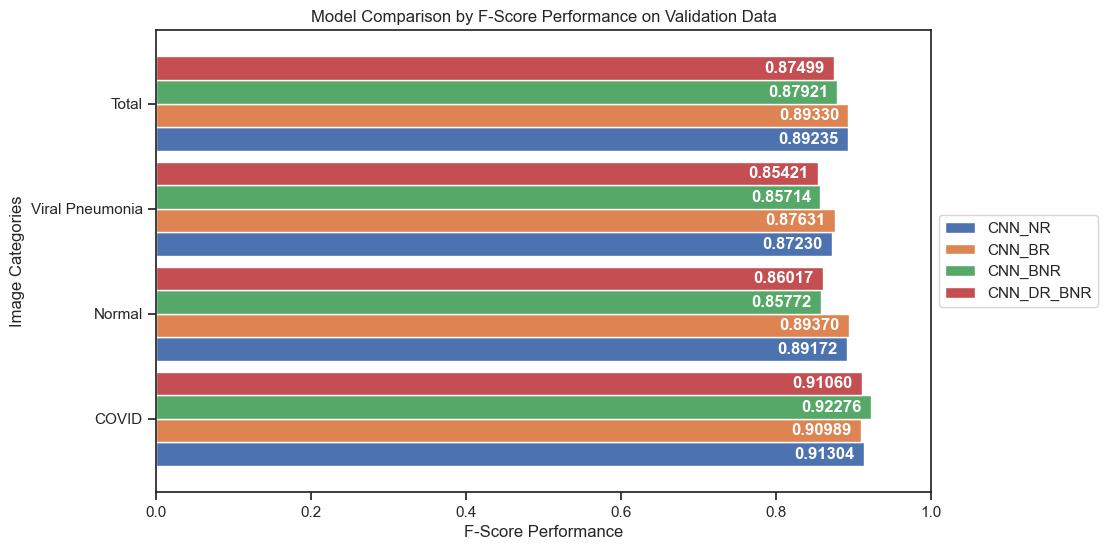

In [99]:
##################################
# Plotting all the fscore
# model performance measures
# for all CNN models
##################################
cnn_model_performance_comparison_fscore_plot = cnn_model_performance_comparison_fscore_plot.plot.barh(figsize=(10, 6), width=0.90)
cnn_model_performance_comparison_fscore_plot.set_xlim(0.00,1.00)
cnn_model_performance_comparison_fscore_plot.set_title("Model Comparison by F-Score Performance on Validation Data")
cnn_model_performance_comparison_fscore_plot.set_xlabel("F-Score Performance")
cnn_model_performance_comparison_fscore_plot.set_ylabel("Image Categories")
cnn_model_performance_comparison_fscore_plot.grid(False)
cnn_model_performance_comparison_fscore_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for container in cnn_model_performance_comparison_fscore_plot.containers:
    cnn_model_performance_comparison_fscore_plot.bar_label(container, fmt='%.5f', padding=-50, color='white', fontweight='bold')

# 2. Summary <a class="anchor" id="Summary"></a>

A detailed [report](https://github.com/JohnPaulinePineda/Unsupervised-Machine-Learning-Final-Assignment/blob/main/UnsupervisedMachineLearningCapstone_JohnPaulinePineda.pdf) was formulated documenting all the analysis steps and findings.


In [100]:
##################################
# Introduction
##################################

In [101]:
##################################
# Methodology
##################################

In [102]:
##################################
# Data Gathering
##################################

In [103]:
##################################
# Data Description
##################################

In [104]:
##################################
# Data Quality Assessment
##################################

In [105]:
##################################
# Data Preprocessing
##################################

In [106]:
##################################
# Data Exploration
##################################

In [107]:
##################################
# Model Development
##################################

In [108]:
##################################
# Overall Findings and Implications
##################################

In [109]:
##################################
# Conclusions
##################################

# 3. References <a class="anchor" id="References"></a>
* **[Book]** [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python) by Francois Chollet
* **[Book]** [Deep Learning: A Visual Approach](https://nostarch.com/deep-learning-visual-approach) by Andrew Glassner
* **[Book]** [Learning Deep Learning](https://ldlbook.com/) by Magnus Ekman
* **[Book]** [Practical Deep Learning](https://nostarch.com/practical-deep-learning-python) by Ronald Kneusel
* **[Book]** [Deep Learning with Tensorflow and Keras](https://www.packtpub.com/product/deep-learning-with-tensorflow-and-keras-third-edition/9781803232911) by Amita Kapoor, Antonio Gulli and Sujit Pal
* **[Book]** [Deep Learning](https://mitpress.mit.edu/9780262537551/deep-learning/) by John Kelleher
* **[Book]** [Generative Deep Learning](https://www.oreilly.com/library/view/generative-deep-learning/9781098134174/) by David Foster
* **[Book]** [Deep Learning Illustrated](https://www.deeplearningillustrated.com/) by John Krohn, Grant Beyleveld and Aglae Bassens
* **[Book]** [Neural Networks and Deep Learning](https://link.springer.com/book/10.1007/978-3-319-94463-0) by Charu Aggarwal
* **[Book]** [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) by Andrew Trask
* **[Book]** [Deep Learning with Pytorch](https://www.manning.com/books/deep-learning-with-pytorch) by Eli Stevens, Luca Antiga and Thomas Viehmann
* **[Book]** [Deep Learning](https://www.deeplearningbook.org/) by Ian Goodfellow, Yoshua Bengio and Aaron Courville
* **[Book]** [Deep Learning from Scratch](https://www.oreilly.com/library/view/deep-learning-from/9781492041405/) by Seth Weidman
* **[Book]** [Fundamentals of Deep Learning](https://www.oreilly.com/library/view/fundamentals-of-deep/9781492082170/) by Nithin Buduma, Nikhil Buduma and Joe Papa
* **[Book]** [Hands-On Machine Learning with Scikit-Learn, Keras and Tensorflow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) by Aurelien Geron
* **[Book]** [Deep Learning for Computer Vision](https://machinelearningmastery.com/deep-learning-for-computer-vision/) by Jason Brownlee
* **[Python Library API]** [numpy](https://numpy.org/doc/) by NumPy Team
* **[Python Library API]** [pandas](https://pandas.pydata.org/docs/) by Pandas Team
* **[Python Library API]** [seaborn](https://seaborn.pydata.org/) by Seaborn Team
* **[Python Library API]** [matplotlib.pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) by MatPlotLib Team
* **[Python Library API]** [matplotlib.image](https://matplotlib.org/stable/api/image_api.html) by MatPlotLib Team
* **[Python Library API]** [matplotlib.offsetbox](https://matplotlib.org/stable/api/offsetbox_api.html) by MatPlotLib Team
* **[Python Library API]** [tensorflow](https://pypi.org/project/tensorflow/) by TensorFlow Team
* **[Python Library API]** [keras](https://pypi.org/project/keras/) by Keras Team
* **[Python Library API]** [pil](https://pypi.org/project/Pillow/) by Pillow Team
* **[Python Library API]** [glob](https://docs.python.org/3/library/glob.html) by glob Team
* **[Python Library API]** [cv2](https://pypi.org/project/opencv-python/) by OpenCV Team
* **[Python Library API]** [os](https://docs.python.org/3/library/os.html) by os Team
* **[Python Library API]** [random](https://docs.python.org/3/library/random.html) by random Team
* **[Python Library API]** [keras.models](https://www.tensorflow.org/api_docs/python/tf/keras/models) by TensorFlow Team
* **[Python Library API]** [keras.layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers) by TensorFlow Team
* **[Python Library API]** [keras.wrappers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Wrapper) by TensorFlow Team
* **[Python Library API]** [keras.utils](https://www.tensorflow.org/api_docs/python/tf/keras/utils) by TensorFlow Team
* **[Python Library API]** [keras.optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) by TensorFlow Team
* **[Python Library API]** [keras.preprocessing.image](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image) by TensorFlow Team
* **[Python Library API]** [keras.callbacks](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks) by TensorFlow Team
* **[Python Library API]** [keras.metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) by TensorFlow Team
* **[Python Library API]** [sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) by Scikit-Learn Team
* **[Article]** [Convolutional Neural Networks, Explained](https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939) by Mayank Mishra (Towards Data Science)
* **[Article]** [A Comprehensive Guide to Convolutional Neural Networks — the ELI5 way](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53) by Sumit Saha (Towards Data Science)
* **[Article]** [Understanding Convolutional Neural Networks: A Beginner’s Journey into the Architecture](https://medium.com/codex/understanding-convolutional-neural-networks-a-beginners-journey-into-the-architecture-aab30dface10) by Afaque Umer (Medium)
* **[Article]** [Introduction to Convolutional Neural Networks (CNN)](https://www.analyticsvidhya.com/blog/2021/05/convolutional-neural-networks-cnn/) by Manav Mandal (Analytics Vidhya)
* **[Article]** [What Are Convolutional Neural Networks?](https://www.ibm.com/topics/convolutional-neural-networks) by IBM Team (IBM)
* **[Article]** [What is CNN? A 5 Year Old guide to Convolutional Neural Network](https://medium.com/analytics-vidhya/what-is-cnn-a-5-year-old-guide-to-convolutional-neural-network-c9d0338c3bf7) by William Ong (Medium)
* **[Article]** [Convolutional Neural Network](https://deepai.org/machine-learning-glossary-and-terms/convolutional-neural-network) by Thomas Wood (DeepAI.Org)
* **[Article]** [How Do Convolutional Layers Work in Deep Learning Neural Networks?](https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [Convolutional Neural Networks Explained: Using PyTorch to Understand CNNs](https://builtin.com/data-science/convolutional-neural-networks-explained) by Vihar Kurama (BuiltIn)
* **[Article]** [Convolutional Neural Networks Cheatsheet](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks) by Afshine Amidi and Shervine Amidi (Stanford University)
* **[Article]** [An Intuitive Explanation of Convolutional Neural Networks](https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/) by Ujjwal Karn (The Data Science Blog)
* **[Article]** [Convolutional Neural Network](https://www.nvidia.com/en-us/glossary/data-science/convolutional-neural-network/) by NVIDIA Team (NVIDIA)
* **[Article]** [Convolutional Neural Networks (CNN) Overview](https://encord.com/blog/convolutional-neural-networks-explained/) by Nikolaj Buhl (Encord)
* **[Article]** [Understanding Convolutional Neural Network (CNN): A Complete Guide](https://learnopencv.com/understanding-convolutional-neural-networks-cnn/) by LearnOpenCV Team (LearnOpenCV)
* **[Article]** [Convolutional Neural Networks (CNNs) and Layer Types](https://pyimagesearch.com/2021/05/14/convolutional-neural-networks-cnns-and-layer-types/) by Adrian Rosebrock (PyImageSearch)
* **[Article]** [How Convolutional Neural Networks See The World](https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html) by Francois Chollet (The Keras Blog)
* **[Article]** [What Is a Convolutional Neural Network?](https://www.mathworks.com/discovery/convolutional-neural-network-matlab.html#:~:text=A%20convolutional%20neural%20network%20(CNN,%2Dseries%2C%20and%20signal%20data.) by MathWorks Team (MathWorks)
* **[Kaggle Project]** [Covid 19 Radiography Data - EDA and CNN Model](https://www.kaggle.com/code/jnegrini/covid-19-radiography-data-eda-and-cnn-model) by Juliana Negrini De Araujo (Kaggle)
* **[Kaggle Project]** [Pneumonia Detection using CNN (92.6% Accuracy)](https://www.kaggle.com/code/madz2000/pneumonia-detection-using-cnn-92-6-accuracy) by Madhav Mathur (Kaggle)
* **[Kaggle Project]** [COVID Detection from CXR Using Explainable CNN](https://www.kaggle.com/code/sid321axn/covid-detection-from-cxr-using-explainable-cnn) by Manu Siddhartha (Kaggle)
* **[Kaggle Project]** [Class Activation Mapping for COVID-19 CNN](https://www.kaggle.com/code/amyjang/class-activation-mapping-for-covid-19-cnn) by Amy Zhang (Kaggle)
* **[Kaggle Project]** [CNN XRay COVID Classification](https://www.kaggle.com/code/gabrielmino/cnn-xray-covid-classification) by Gabriel Mino (Kaggle)
* **[Kaggle Project]** [Detecting-Covid-19-Images | CNN](https://www.kaggle.com/code/felipeoliveiraml/detecting-covid-19-images-cnn) by Felipe Oliveira (Kaggle)
* **[Kaggle Project]** [Detection of Covid Positive Cases using DL](https://www.kaggle.com/code/sana306/detection-of-covid-positive-cases-using-dl) by Sana Shaikh (Kaggle)
* **[Kaggle Project]** [Deep Learning and Transfer Learning on COVID-19](https://www.kaggle.com/code/digvijayyadav/deep-learning-and-transfer-learning-on-covid-19) by Digvijay Yadav (Kaggle)
* **[Kaggle Project]** [X-ray Detecting Using CNN](https://www.kaggle.com/code/shivan118/x-ray-detecting-using-cnn) by Shivan Kumar (Kaggle)
* **[Kaggle Project]** [Classification of COVID-19 using CNN](https://www.kaggle.com/code/islamselim/classification-of-covid-19-using-cnn) by Islam Selim (Kaggle)
* **[Kaggle Project]** [COVID-19 - Revisiting Pneumonia Detection](https://www.kaggle.com/code/pcbreviglieri/covid-19-revisiting-pneumonia-detection) by Paulo Breviglieri (Kaggle)
* **[Kaggle Project]** [Multi-Class X-ray Covid19 Classification-94% Accurary](https://www.kaggle.com/code/derrelldsouza/multi-class-x-ray-covid19-classification-94-acc) by Derrel Souza (Kaggle)
* **[Publication]** [Gradient-Based Learning Applied to Document Recognition](https://ieeexplore.ieee.org/document/726791) by Yann LeCun, Leon Bottou, Yoshua Bengio and Patrick Haffner (Proceedings of the IEEE)


In [110]:
from IPython.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 15px; font-family: 'Trebuchet MS'; }</style>"))

***